
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

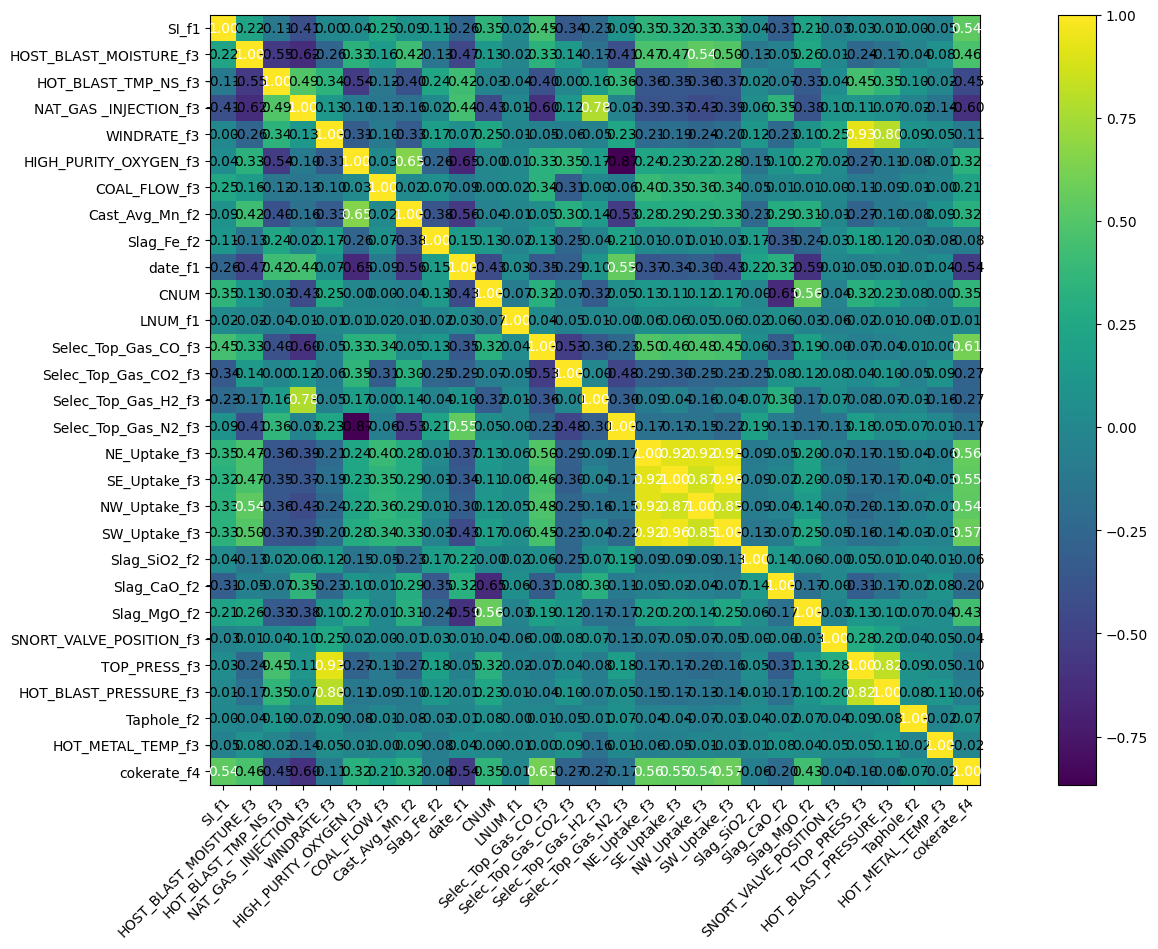

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Pass Wrangled data to GPT experimenter


In [14]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [15]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)

    sdtw_criterion = SoftDTW(use_cuda=True, gamma=0.1)

    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
      
        ###########################################
        
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   

        ###########################################
        
        ## loss_change_pred = loss_change_pred[ :, : 10 ]
        ## loss_change_real = loss_change_real[ :, : 10 ]
        ## T = loss_change_pred.shape[1] + 1   ## remove rc

        ###########################################
        
        loss_A = 0 ### 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 ### 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 ### 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )

        ############################################
        
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        #######################################################
  
        loss_DTW = sdtw_criterion(loss_change_pred.reshape(B,(T-1), E )[:,:, 2:3], loss_change_real.reshape(B, (T-1),E )[:, :, 2:3] )  
        ## loss_DTW = ( loss_DTW )**2
        loss_DTW = loss_DTW.mean()  

        #######################################################

        ## Curve_SIMs[1] 

        loss_total = loss_DTW        ## * 0.001 + Curve_SIMs[3]     
        
        #######################################################
        
        optimizer.zero_grad( set_to_none=True )    
        loss = loss_total          
        loss.backward()
        optimizer.step()
        
        #######################################################
        
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        #history['loss_SIM2'].append( Curve_SIMs[2] )
        #history['loss_SIM3'].append( Curve_SIMs[3] )
        #history['loss_SIM4'].append( Curve_SIMs[4] )
        #history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
            print(Curve_SIMs)
            print("loss_SI...", [ loss_SI  ] )
            print("loss_all..", [ loss_all ] )
            print("loss_DTW..", loss_DTW     )
            print("loss_total..", loss_total )
            print("*************************")
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [16]:

'''

batch_size, len_x, len_y, dims = 8, 15, 12, 5
x = torch.rand((batch_size, len_x, dims), requires_grad=True)
y = torch.rand((batch_size, len_y, dims))
x.shape
x[1, 1, :5]

'''


'\n\nbatch_size, len_x, len_y, dims = 8, 15, 12, 5\nx = torch.rand((batch_size, len_x, dims), requires_grad=True)\ny = torch.rand((batch_size, len_y, dims))\nx.shape\nx[1, 1, :5]\n\n'

In [17]:

## x[1, 1, 2:3]


In [18]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  25.815492630004883
seq length of pred =  30
[ 3.37438457  2.66747343 18.79365608 33.41276636  1.27683436  0.63134171]
loss_SI... [tensor(2.5537, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.4182, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(25.8155, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(25.8155, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.5131635665893555
seq length of pred =  30
[ 2.53978596  1.84041799 14.58312905 25.24943771  1.0395802   0.51052705]
loss_SI... [tensor(2.0792, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.0655, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.5132, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.5132, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  2.118748188018799
seq length of pred =  30
[ 2.53280802  1.73808763 14.11277615 24.261979

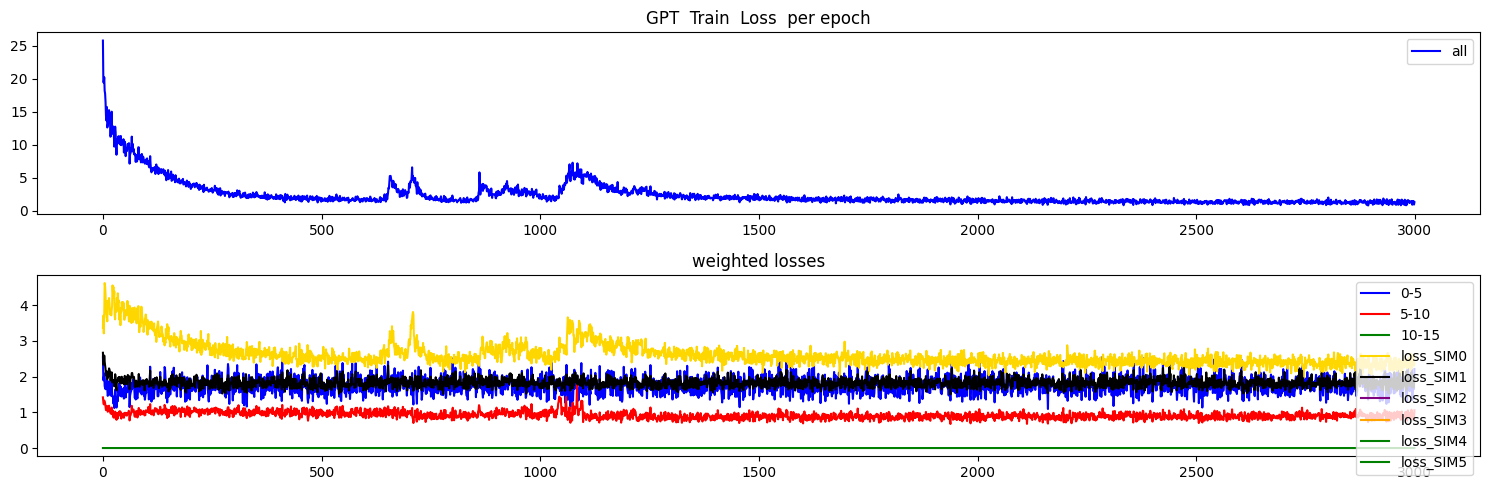

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.027883343398571014
Test MSE Loss - SI only 0-5:  0.025845784693956375
Test MSE Loss - SI only 5-10:  0.020005065947771072
Test MSE Loss - SI only 10-15:  0.02843775786459446
mae, mse, rmse, mape, mspe, rse, corr
(0.14518064, 0.02788334, 0.16698305, 2.4984403, 31.339052, 1.0518223)
Testing R**2 - SI only:  -0.10633021493534
Testing R**2 - SI only:  -0.10633021493534
Testing R**2 - All features:  0.9980233441322345
Testing R**2 - (f2) - SI full:  -0.970950371957392


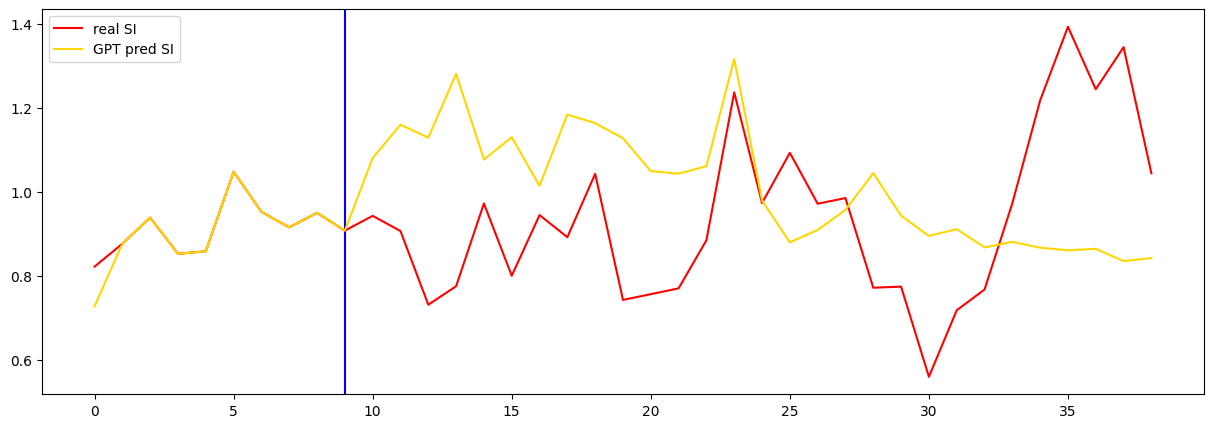

In [19]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  30.8798828125
seq length of pred =  30
[ 3.12013922  3.0887571  17.45128062 32.74646838  1.11836715  0.58680405]
loss_SI... [tensor(2.2367, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1943, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(30.8799, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(30.8799, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.271774172782898
seq length of pred =  30
[ 2.36789869  1.31228562  8.80994666 15.76756716  0.41570017  0.30373373]
loss_SI... [tensor(0.8314, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7922, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.2718, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.2718, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.13694754242897034
seq length of pred =  30
[ 2.17651356  1.17270205  8.6954482  15.17419615  

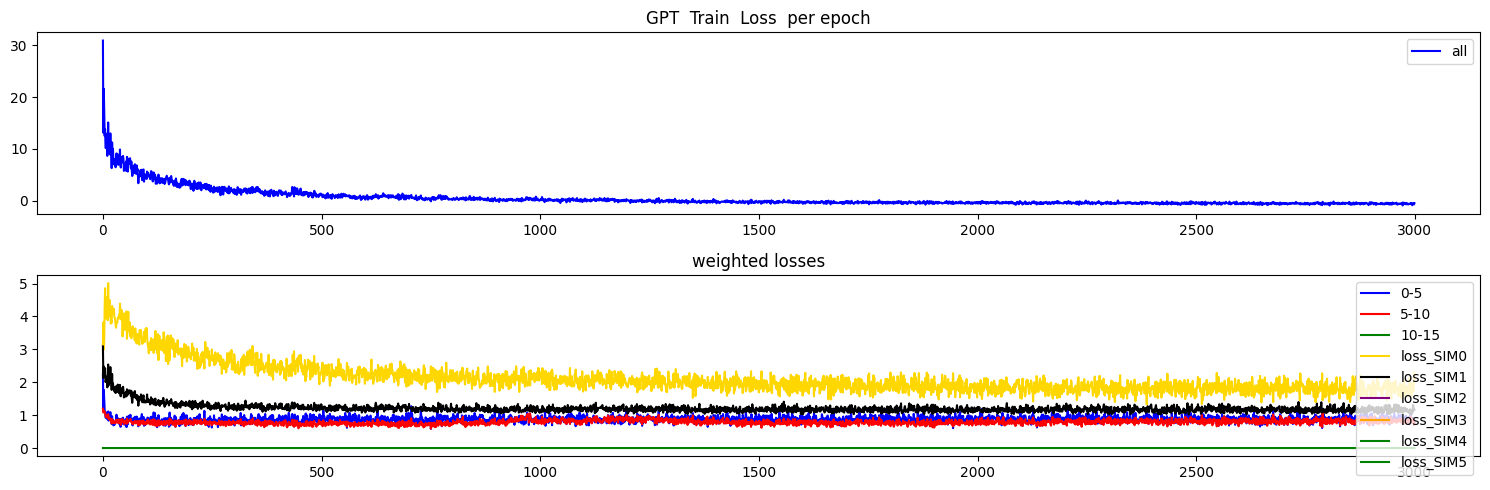

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.046072106808423996
Test MSE Loss - SI only 0-5:  0.025845784693956375
Test MSE Loss - SI only 5-10:  0.026116320863366127
Test MSE Loss - SI only 10-15:  0.04426123946905136
mae, mse, rmse, mape, mspe, rse, corr
(0.17271039, 0.046072114, 0.21464416, 3.562953, 65.759056, 1.3520384)
Testing R**2 - SI only:  -0.8280077800624526
Testing R**2 - SI only:  -0.8280077800624526
Testing R**2 - All features:  0.9586461030197552
Testing R**2 - (f2) - SI full:  -1.0782358247564865


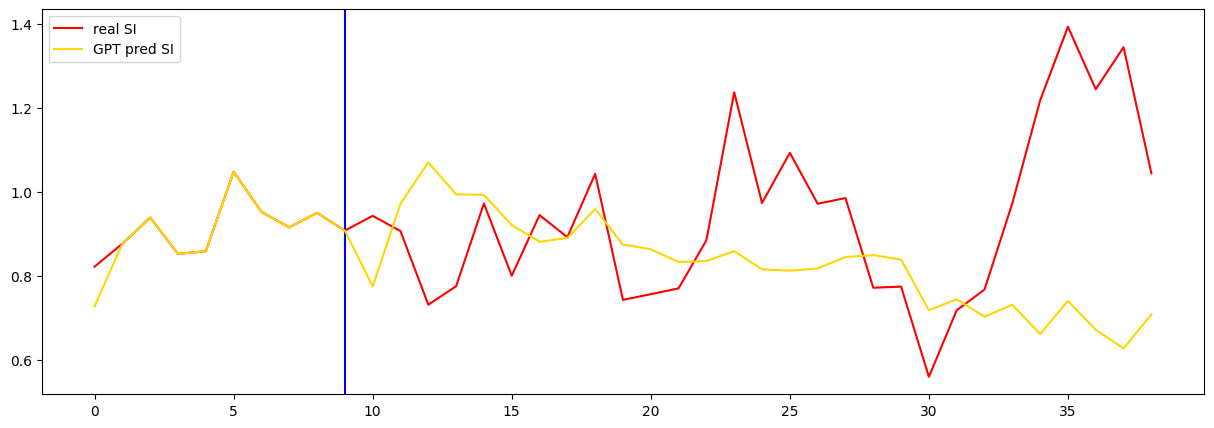

In [20]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  21.594383239746094
seq length of pred =  30
[ 3.82715272  2.50195445 15.15535523 29.13050514  0.91913762  0.52899209]
loss_SI... [tensor(1.8383, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.2414, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(21.5944, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(21.5944, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  3.7703423500061035
seq length of pred =  30
[ 3.32804526  1.96352163 12.56330235 21.67442035  0.65756395  0.39514605]
loss_SI... [tensor(1.3151, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8273, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(3.7703, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(3.7703, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  2.4692907333374023
seq length of pred =  30
[ 3.16638888  2.00511563 12.90154853 21.09665

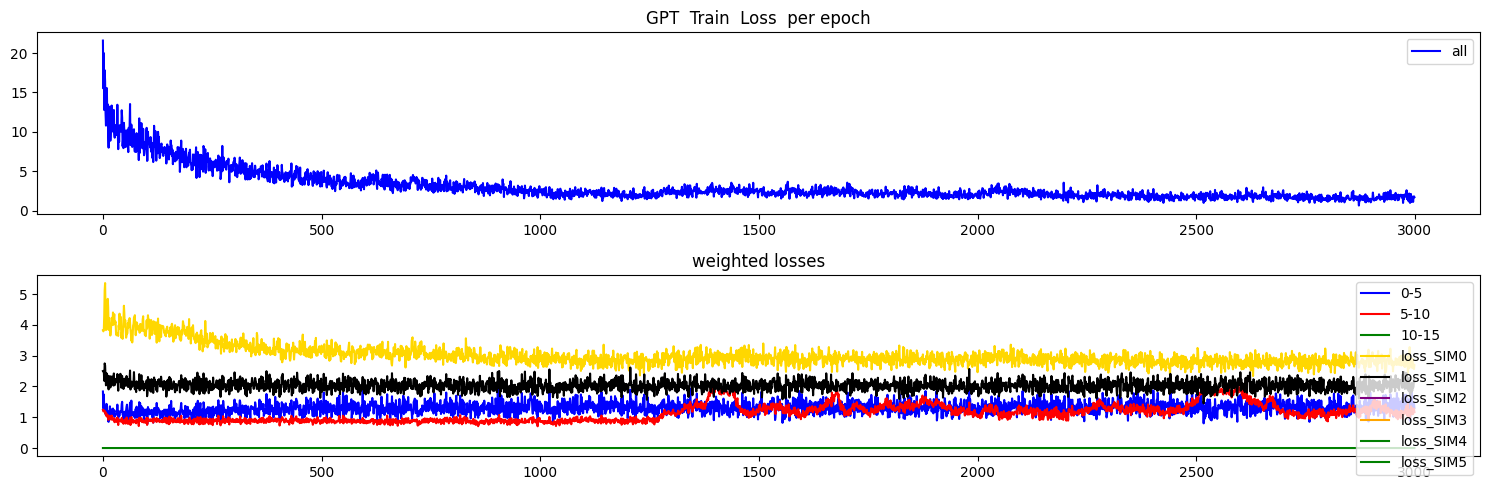

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.04182721674442291
Test MSE Loss - SI only 0-5:  0.025845777243375778
Test MSE Loss - SI only 5-10:  0.02269841358065605
Test MSE Loss - SI only 10-15:  0.058713726699352264
mae, mse, rmse, mape, mspe, rse, corr
(0.17462204, 0.04182722, 0.20451704, 4.2513623, 165.6698, 1.2882481)
Testing R**2 - SI only:  -0.6595828437504803
Testing R**2 - SI only:  -0.6595828437504803
Testing R**2 - All features:  0.8852815607730767
Testing R**2 - (f2) - SI full:  -1.2656718917836853


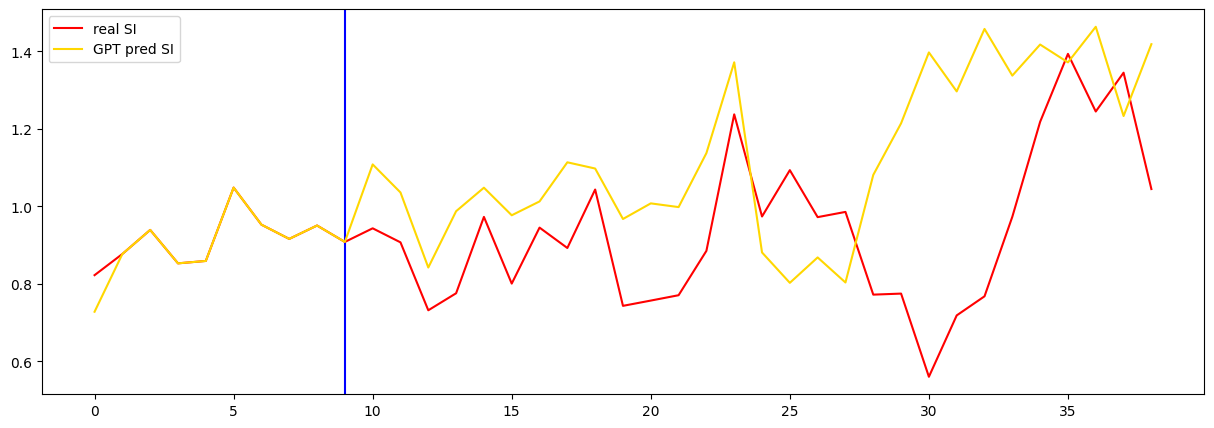

In [21]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  19.939102172851562
seq length of pred =  30
[ 3.89680029  2.49477552 15.67833326 30.46100707  0.95791618  0.55262784]
loss_SI... [tensor(1.9158, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1890, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(19.9391, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(19.9391, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  3.854668617248535
seq length of pred =  30
[ 3.44932638  1.92886063 11.91308893 21.01331451  0.5682053   0.38168754]
loss_SI... [tensor(1.1364, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7947, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(3.8547, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(3.8547, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  3.1490373611450195
seq length of pred =  30
[ 2.77031646  1.93100993 11.68797896 19.862024

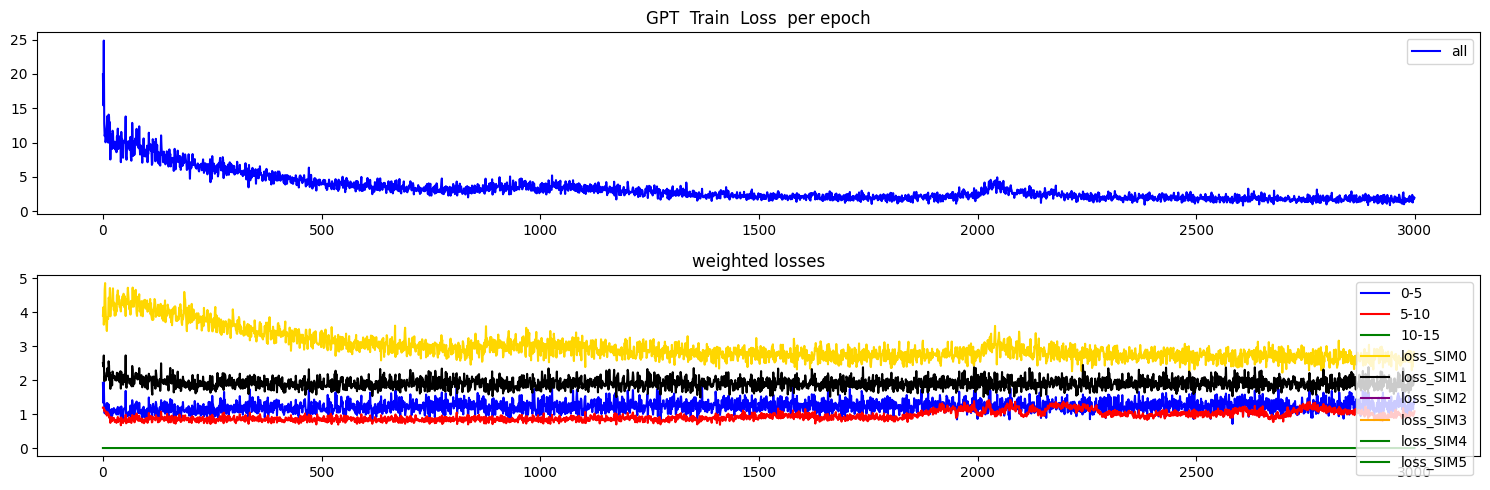

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.05372078716754913
Test MSE Loss - SI only 0-5:  0.025845784693956375
Test MSE Loss - SI only 5-10:  0.036496974527835846
Test MSE Loss - SI only 10-15:  0.07078494131565094
mae, mse, rmse, mape, mspe, rse, corr
(0.18305005, 0.05372079, 0.23177746, 3.8430645, 82.794876, 1.4599607)
Testing R**2 - SI only:  -1.1314851314892351
Testing R**2 - SI only:  -1.1314851314892351
Testing R**2 - All features:  0.9910050029573589
Testing R**2 - (f2) - SI full:  -0.09388654873248425


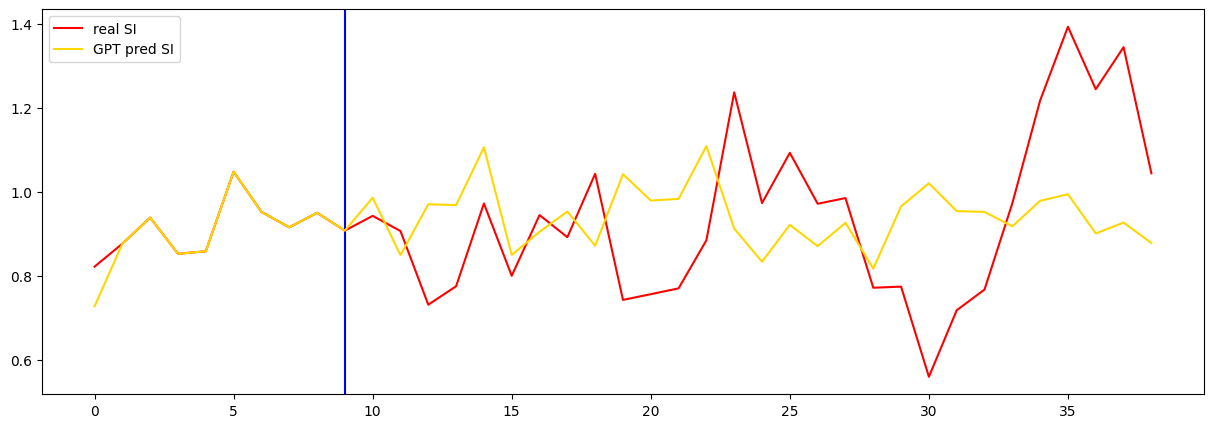

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )



## Run 2


In [23]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  23.17477798461914
seq length of pred =  30
[ 4.82718309  2.51479815 16.92415396 32.25277677  1.13915749  0.60282848]
loss_SI... [tensor(2.2783, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.6127, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(23.1748, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(23.1748, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  3.4187779426574707
seq length of pred =  30
[ 2.7584922   2.20833628 17.16806281 27.25972958  1.3190061   0.57629384]
loss_SI... [tensor(2.6380, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.2124, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(3.4188, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(3.4188, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  3.16817045211792
seq length of pred =  30
[ 2.54018041  2.5148288  18.57234323 30.43952153

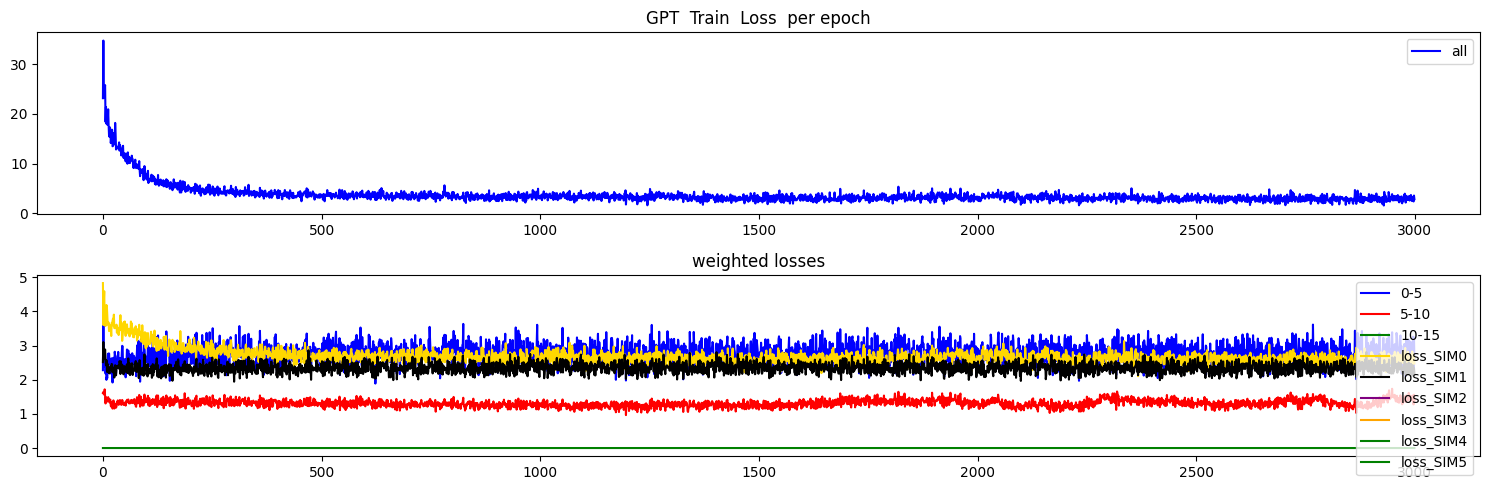

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.06430770456790924
Test MSE Loss - SI only 0-5:  0.018373489379882812
Test MSE Loss - SI only 5-10:  0.09612718969583511
Test MSE Loss - SI only 10-15:  0.08334723860025406
mae, mse, rmse, mape, mspe, rse, corr
(0.20780422, 0.064307705, 0.25358963, 38.42081, 43099.188, 1.464121)
Testing R**2 - SI only:  -1.1436504430207193
Testing R**2 - SI only:  -1.1436504430207193
Testing R**2 - All features:  0.9765627565978787
Testing R**2 - (f2) - SI full:  -0.5439051999081856


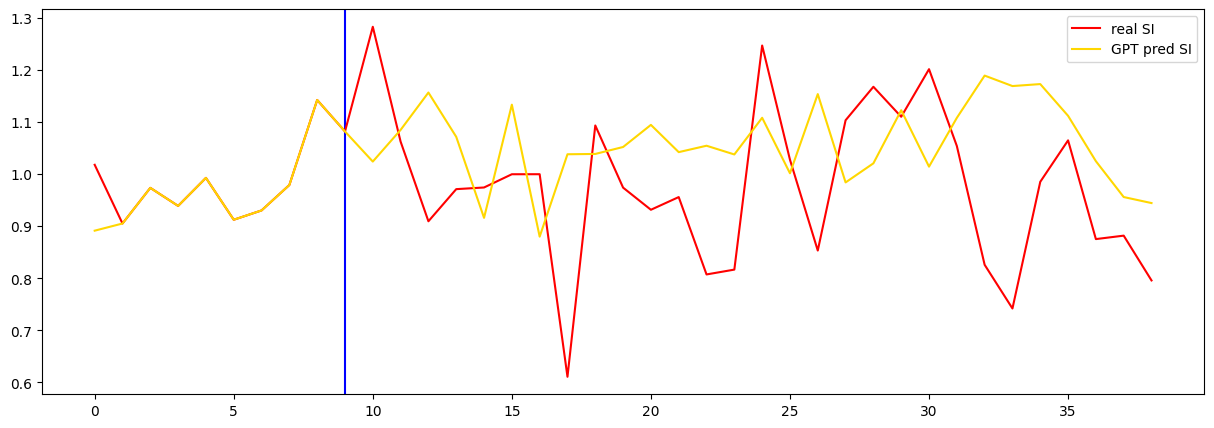

In [24]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )


0 train loss =  27.134868621826172
seq length of pred =  30
[ 3.28356789  2.99007564 19.40837605 32.35939612  1.15057548  0.59202053]
loss_SI... [tensor(2.3012, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.2262, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(27.1349, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(27.1349, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  4.708029747009277
seq length of pred =  30
[ 2.86413284  2.24756772 15.68358392 25.44387511  0.88101096  0.48517252]
loss_SI... [tensor(1.7620, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8815, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(4.7080, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(4.7080, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  3.8984010219573975
seq length of pred =  30
[ 2.90313282  2.1346899  16.59151849 25.664017

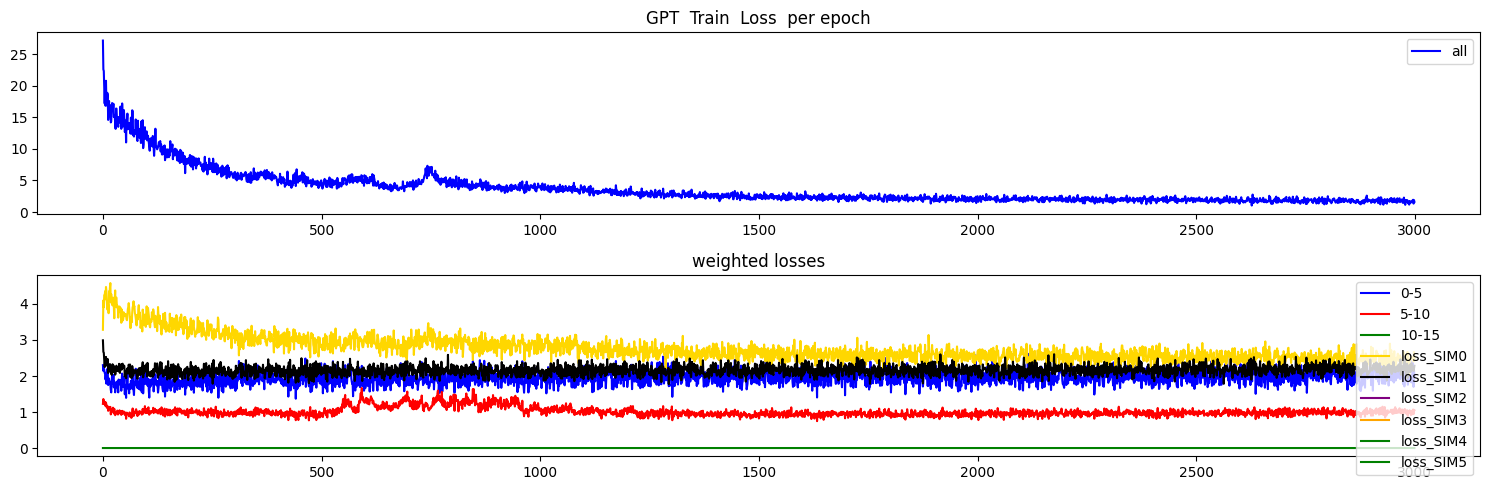

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.04779159277677536
Test MSE Loss - SI only 0-5:  0.018373489379882812
Test MSE Loss - SI only 5-10:  0.04494894668459892
Test MSE Loss - SI only 10-15:  0.08673073351383209
mae, mse, rmse, mape, mspe, rse, corr
(0.17804238, 0.047791593, 0.21861288, 13.871816, 4419.466, 1.2621797)
Testing R**2 - SI only:  -0.59309778029047
Testing R**2 - SI only:  -0.59309778029047
Testing R**2 - All features:  0.9692714604665168
Testing R**2 - (f2) - SI full:  -0.6828224263838856


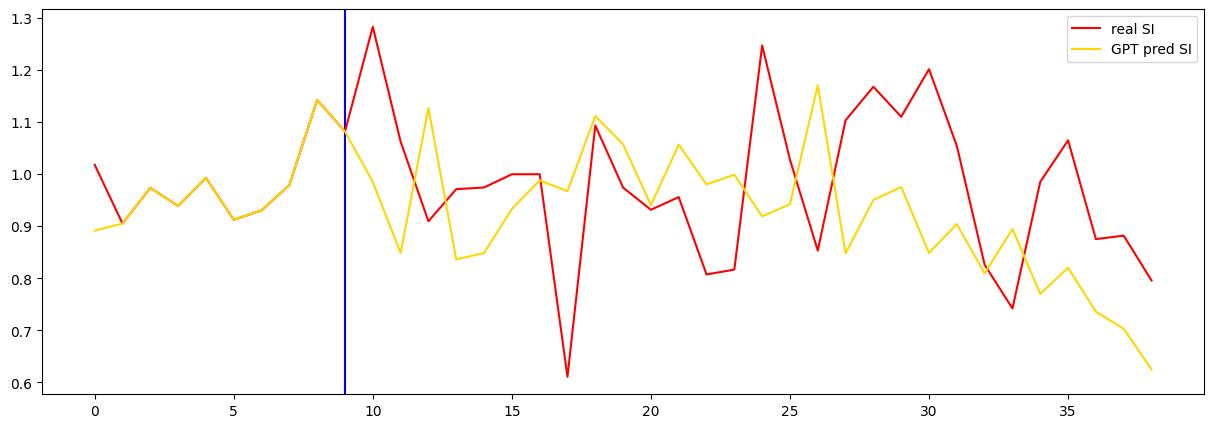

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  15.891984939575195
seq length of pred =  30
[ 4.12724502  2.41794765 14.69502509 26.13223034  0.7356592   0.4651758 ]
loss_SI... [tensor(1.4713, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.2584, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(15.8920, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(15.8920, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  3.854485273361206
seq length of pred =  30
[ 3.0162091   1.81804865 13.10558911 21.8954942   0.62174406  0.40180974]
loss_SI... [tensor(1.2435, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8378, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(3.8545, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(3.8545, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  3.6446242332458496
seq length of pred =  30
[ 3.12252024  1.87011354 14.01786084 23.062019

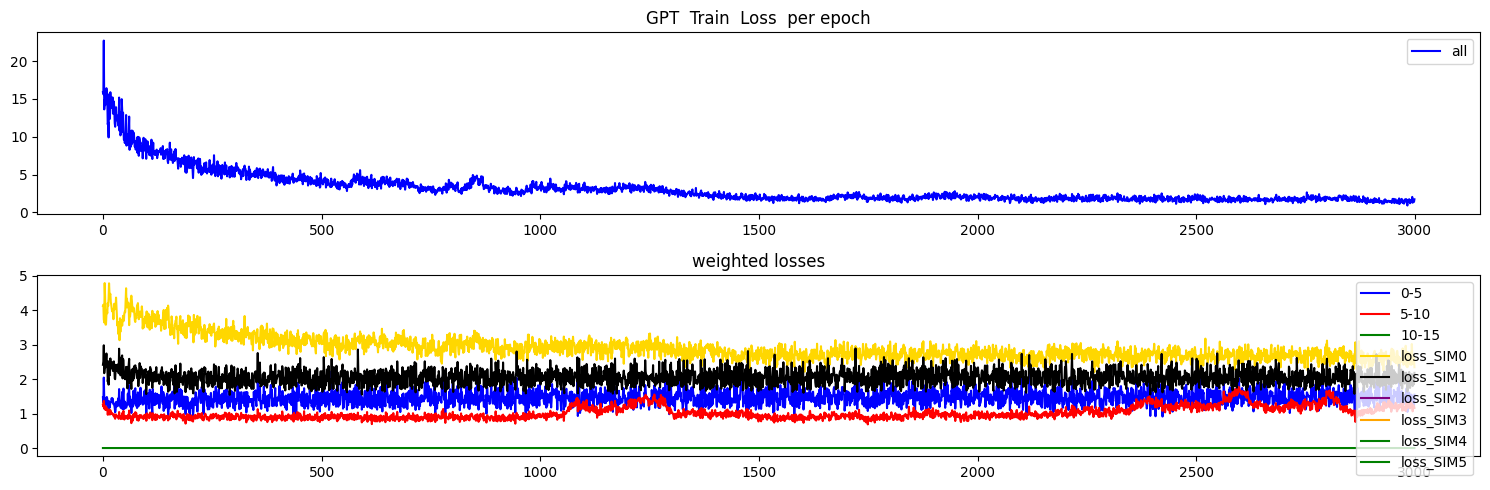

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.03730015456676483
Test MSE Loss - SI only 0-5:  0.018373489379882812
Test MSE Loss - SI only 5-10:  0.02302885614335537
Test MSE Loss - SI only 10-15:  0.10113535076379776
mae, mse, rmse, mape, mspe, rse, corr
(0.14665213, 0.03730015, 0.19313248, 30.424896, 31187.719, 1.1150664)
Testing R**2 - SI only:  -0.24337339482955578
Testing R**2 - SI only:  -0.24337339482955578
Testing R**2 - All features:  0.9852696517365642
Testing R**2 - (f2) - SI full:  -3.4362996028506227


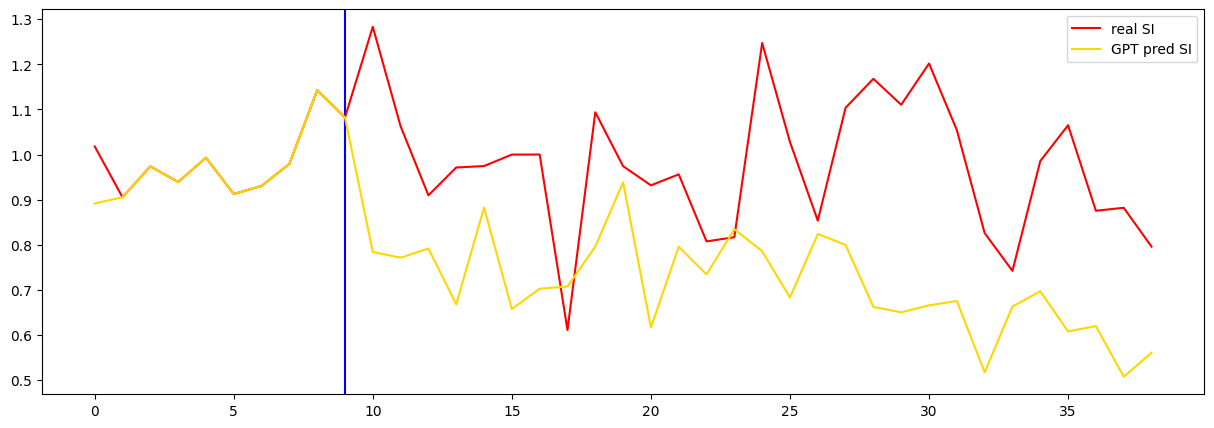

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  21.611858367919922
seq length of pred =  30
[ 4.13656779  2.80713987 15.66330839 28.60167338  0.96247294  0.52605772]
loss_SI... [tensor(1.9249, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.2772, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(21.6119, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(21.6119, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  2.132335901260376
seq length of pred =  30
[ 2.23298863  1.19095587 13.53537031 24.11148424  0.97023498  0.5403019 ]
loss_SI... [tensor(1.9405, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.6953, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(2.1323, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(2.1323, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  1.4094651937484741
seq length of pred =  30
[ 2.1071149   1.16700858 12.78049854 23.545438

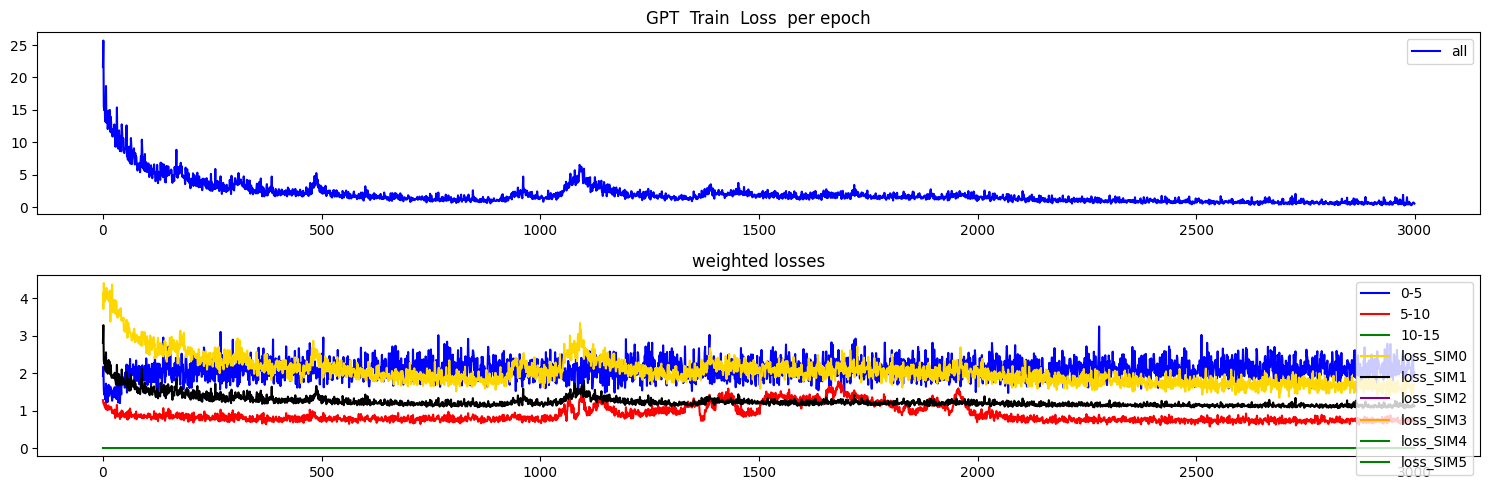

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.03803809732198715
Test MSE Loss - SI only 0-5:  0.018373489379882812
Test MSE Loss - SI only 5-10:  0.02681894227862358
Test MSE Loss - SI only 10-15:  0.07975715398788452
mae, mse, rmse, mape, mspe, rse, corr
(0.14875191, 0.0380381, 0.1950336, 20.219608, 11463.055, 1.1260426)
Testing R**2 - SI only:  -0.2679722027985625
Testing R**2 - SI only:  -0.2679722027985625
Testing R**2 - All features:  0.9633353604647455
Testing R**2 - (f2) - SI full:  -8.32445009893651


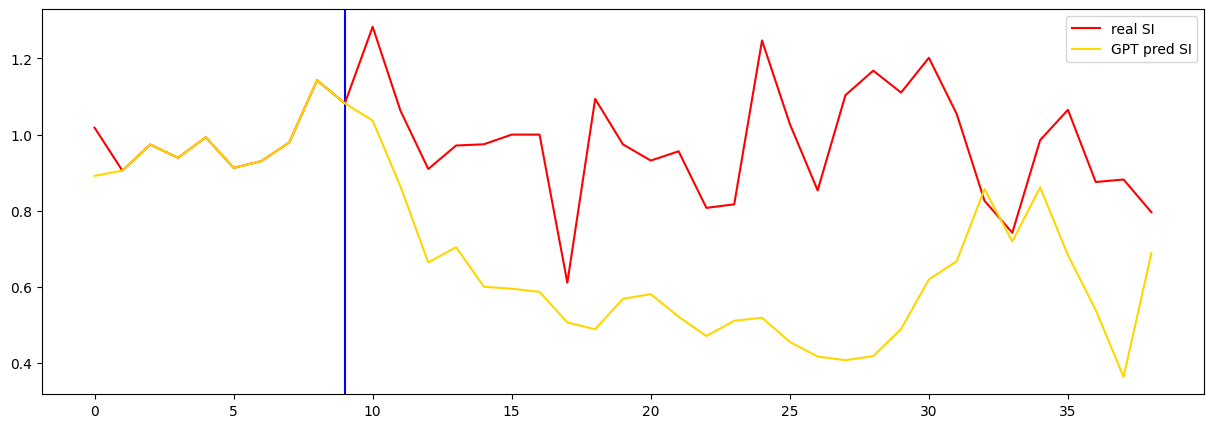

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )



## Run 3


In [28]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  11.609023094177246
seq length of pred =  30
[ 3.51147201  1.88850653 12.71716652 23.26113115  0.50175751  0.40449555]
loss_SI... [tensor(1.0035, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1836, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(11.6090, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(11.6090, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.09195323288440704
seq length of pred =  30
[ 2.65448993  1.31048185  7.59442629 14.45730516  0.29484314  0.26409397]
loss_SI... [tensor(0.5897, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8118, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.0920, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.0920, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.7525362968444824
seq length of pred =  30
[ 2.91207249  1.16302751  6.81176724 13.6952

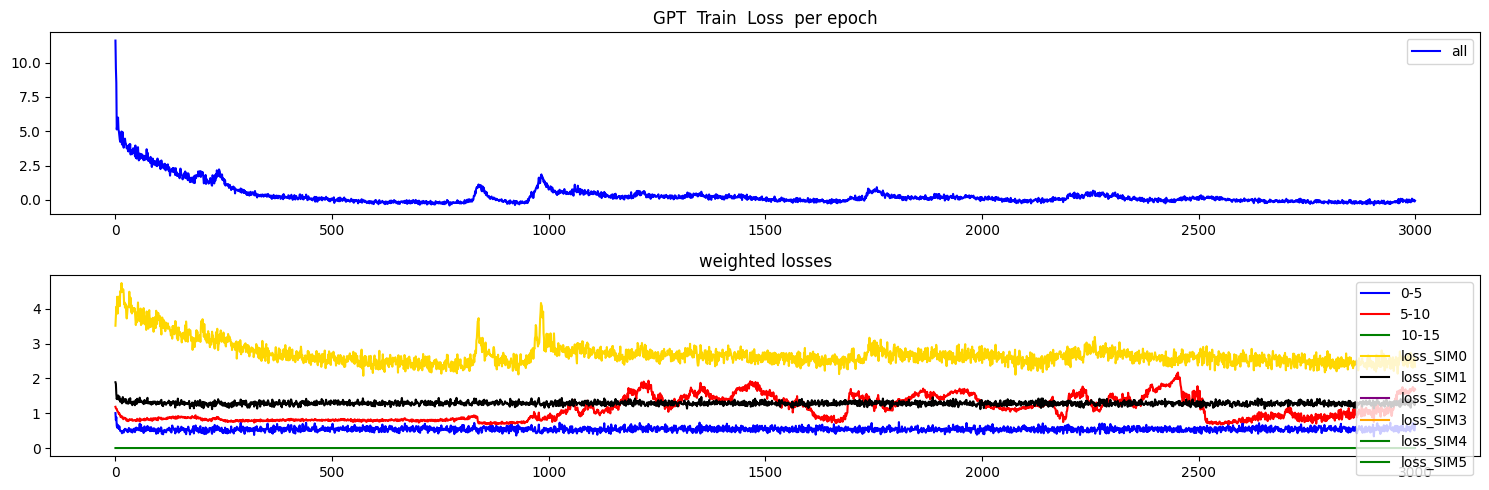

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.07489580661058426
Test MSE Loss - SI only 0-5:  0.04206138104200363
Test MSE Loss - SI only 5-10:  0.04280957579612732
Test MSE Loss - SI only 10-15:  0.05634714290499687
mae, mse, rmse, mape, mspe, rse, corr
(0.2115527, 0.0748958, 0.27367097, 14.23222, 3761.4749, 1.273143)
Testing R**2 - SI only:  -0.6208932718466063
Testing R**2 - SI only:  -0.6208932718466063
Testing R**2 - All features:  0.9155002202015585
Testing R**2 - (f2) - SI full:  -0.44078520757146133


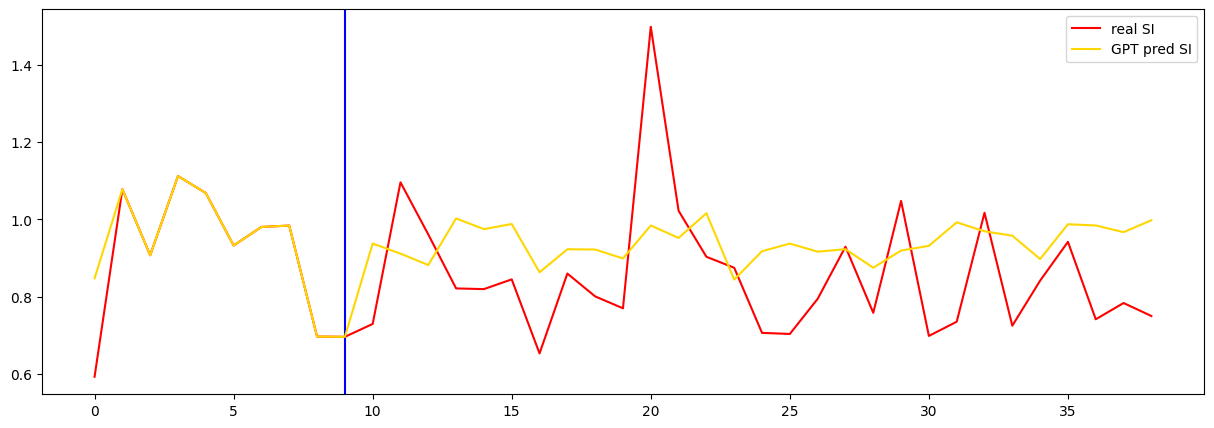

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )


0 train loss =  33.958396911621094
seq length of pred =  30
[ 3.36275701  3.46110751 17.34336261 30.68678608  1.10002023  0.54443354]
loss_SI... [tensor(2.2000, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.3179, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(33.9584, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(33.9584, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  2.241553783416748
seq length of pred =  30
[ 3.53678413  2.7637126  12.61167274 20.06133837  1.1965905   0.36344839]
loss_SI... [tensor(2.3932, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1200, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(2.2416, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(2.2416, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.5451501607894897
seq length of pred =  30
[ 3.0563397   2.11876579 10.59549065 17.204336

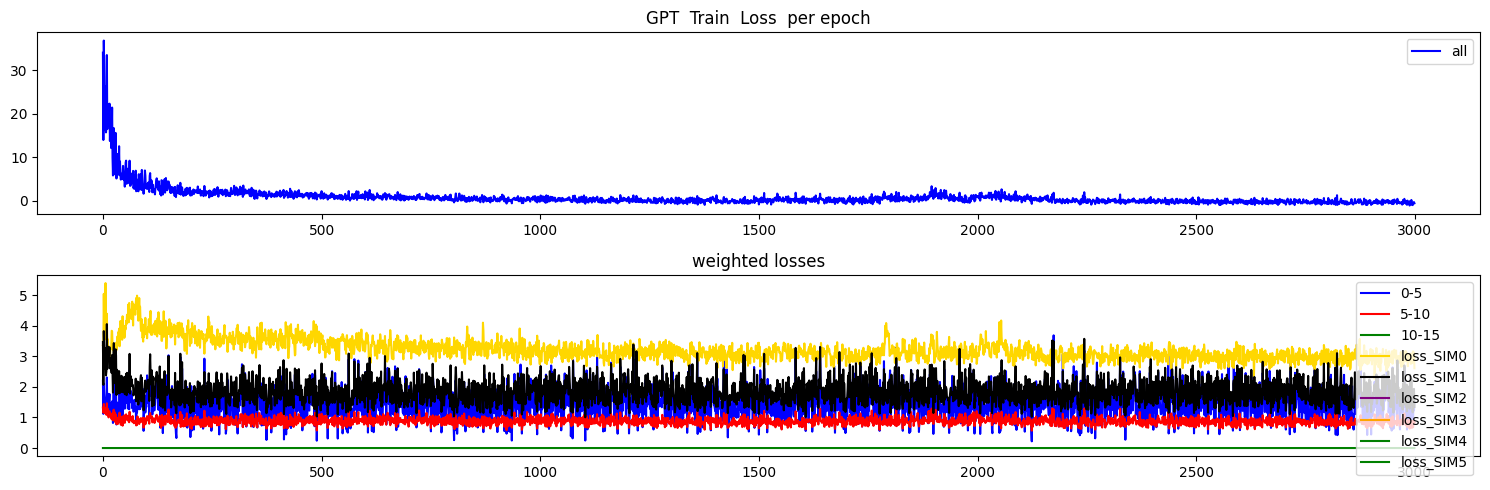

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.21814002096652985
Test MSE Loss - SI only 0-5:  0.04206138104200363
Test MSE Loss - SI only 5-10:  0.17825239896774292
Test MSE Loss - SI only 10-15:  0.18302960693836212
mae, mse, rmse, mape, mspe, rse, corr
(0.4081075, 0.21814004, 0.46705464, 25.66986, 6349.5205, 2.172782)
Testing R**2 - SI only:  -3.720981176736581
Testing R**2 - SI only:  -3.720981176736581
Testing R**2 - All features:  0.987147899583675
Testing R**2 - (f2) - SI full:  -3.835034002257787


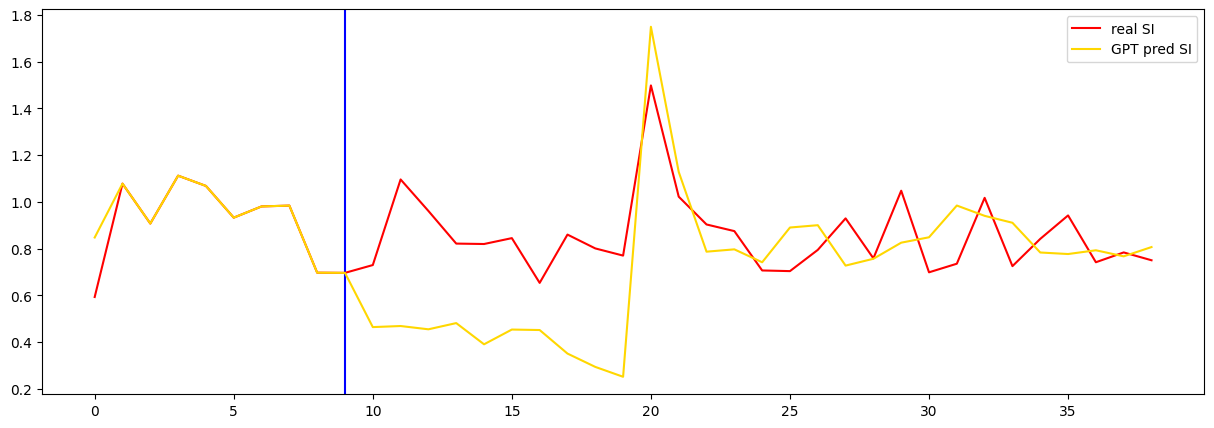

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )


0 train loss =  19.732868194580078
seq length of pred =  30
[ 4.09256867  2.27159965 12.69630574 25.36636378  0.72564906  0.44733736]
loss_SI... [tensor(1.4513, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.0411, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(19.7329, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(19.7329, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.1242210865020752
seq length of pred =  30
[ 3.82233942  1.20092146  6.37928178 12.77708495  0.16711789  0.22072147]
loss_SI... [tensor(0.3342, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.5513, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.1242, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.1242, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  1.6509661674499512
seq length of pred =  30
[ 3.15377358  2.01139543 10.88397418 18.14130

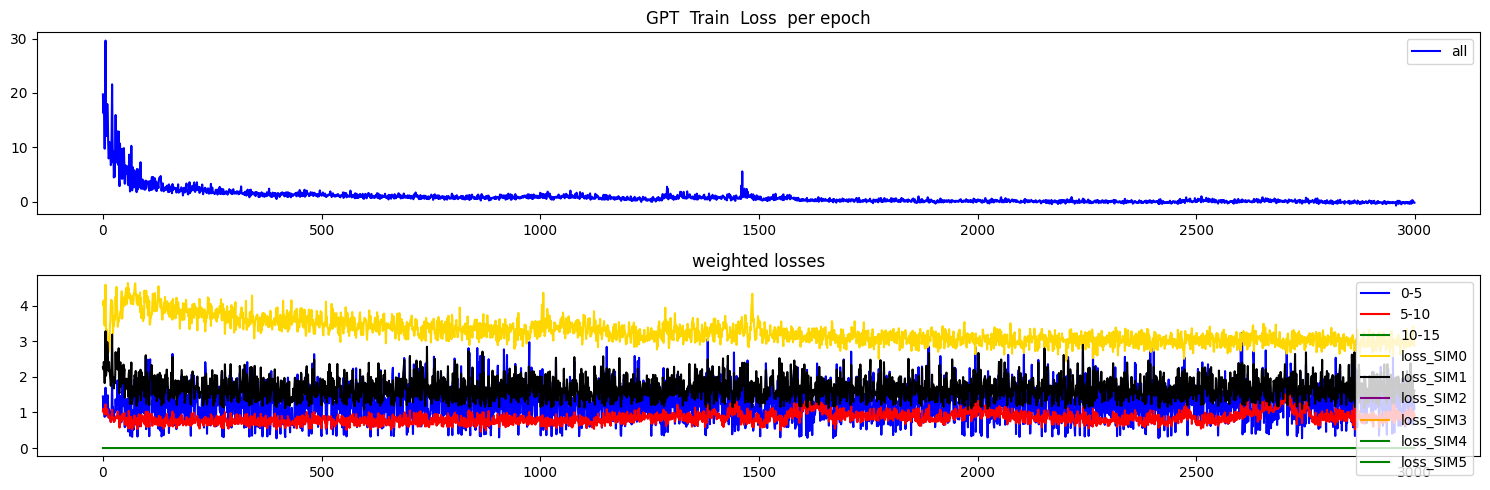

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.060717497020959854
Test MSE Loss - SI only 0-5:  0.04206138104200363
Test MSE Loss - SI only 5-10:  0.03739958256483078
Test MSE Loss - SI only 10-15:  0.022507673129439354
mae, mse, rmse, mape, mspe, rse, corr
(0.20076196, 0.06071749, 0.2464092, 12.112678, 3534.5576, 1.1463188)
Testing R**2 - SI only:  -0.3140466380895677
Testing R**2 - SI only:  -0.3140466380895677
Testing R**2 - All features:  0.9695452419988203
Testing R**2 - (f2) - SI full:  -7.975887206030512


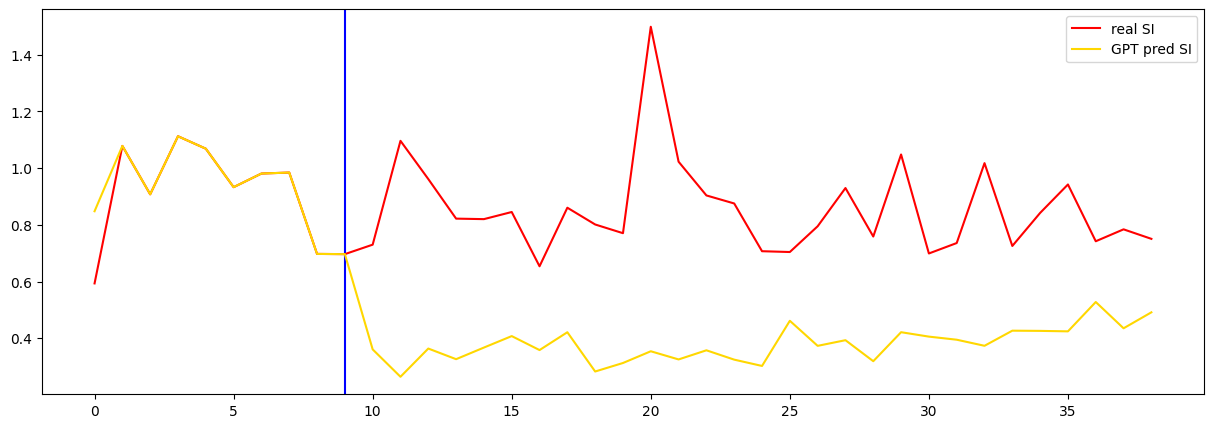

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  32.54498291015625
seq length of pred =  30
[ 4.26376746  3.38613649 16.48901658 29.64058257  1.14988219  0.52328583]
loss_SI... [tensor(2.2998, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.3158, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(32.5450, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(32.5450, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.5315029621124268
seq length of pred =  30
[ 3.56898508  1.2514237   6.1698303  13.06174391  0.1778539   0.22673306]
loss_SI... [tensor(0.3557, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.6311, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.5315, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.5315, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.8531999588012695
seq length of pred =  30
[ 3.54615449  1.1853652   6.09308625 12.847480

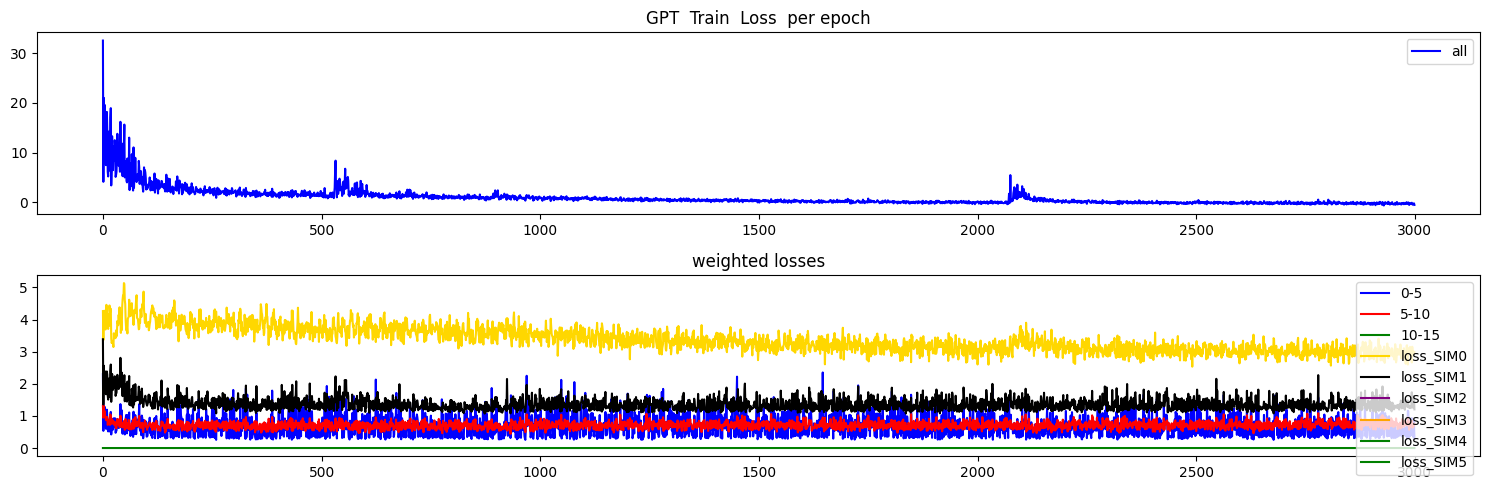

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.08999528735876083
Test MSE Loss - SI only 0-5:  0.04206138104200363
Test MSE Loss - SI only 5-10:  0.055472880601882935
Test MSE Loss - SI only 10-15:  0.06592798233032227
mae, mse, rmse, mape, mspe, rse, corr
(0.25225484, 0.08999529, 0.29999214, 17.513401, 4161.519, 1.3955916)
Testing R**2 - SI only:  -0.9476760841779384
Testing R**2 - SI only:  -0.9476760841779384
Testing R**2 - All features:  0.9657304281843755
Testing R**2 - (f2) - SI full:  -17.654808404622162


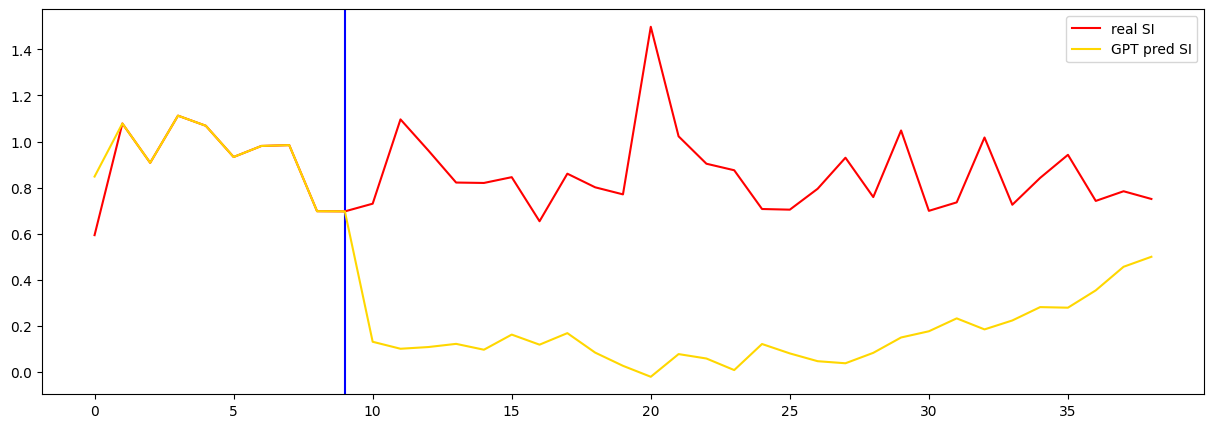

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )



## Run 4


In [33]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  24.426746368408203
seq length of pred =  30
[ 3.45418626  2.62507365 15.9499858  30.6242605   1.04236285  0.56287902]
loss_SI... [tensor(2.0847, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1891, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(24.4267, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(24.4267, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.07379379868507385
seq length of pred =  30
[ 2.55320521  1.73128642  9.93132084 15.28277372  0.37887829  0.27145263]
loss_SI... [tensor(0.7578, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7104, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.0738, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.0738, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.2059415578842163
seq length of pred =  30
[ 2.63487149  1.46870843  9.06052523 14.

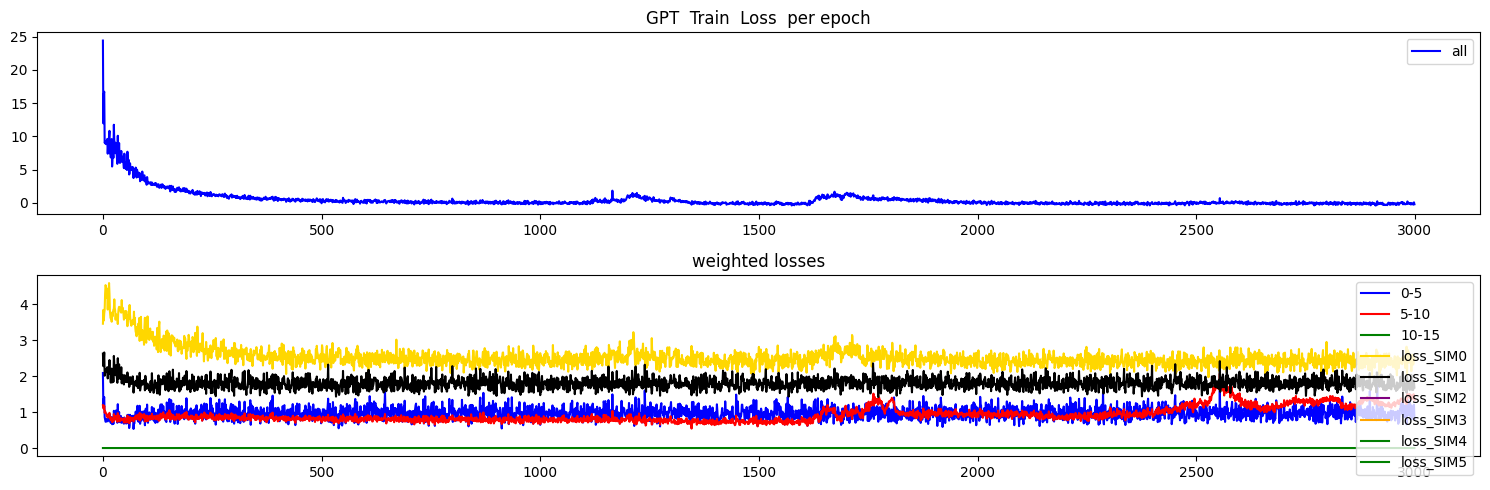

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.07724270224571228
Test MSE Loss - SI only 0-5:  0.038410477340221405
Test MSE Loss - SI only 5-10:  0.09700240194797516
Test MSE Loss - SI only 10-15:  0.060922227799892426
mae, mse, rmse, mape, mspe, rse, corr
(0.2230243, 0.07724271, 0.27792573, 50.21337, 83806.22, 1.2630789)
Testing R**2 - SI only:  -0.5953682076773406
Testing R**2 - SI only:  -0.5953682076773406
Testing R**2 - All features:  0.6154812532983073
Testing R**2 - (f2) - SI full:  -0.5241112541983768


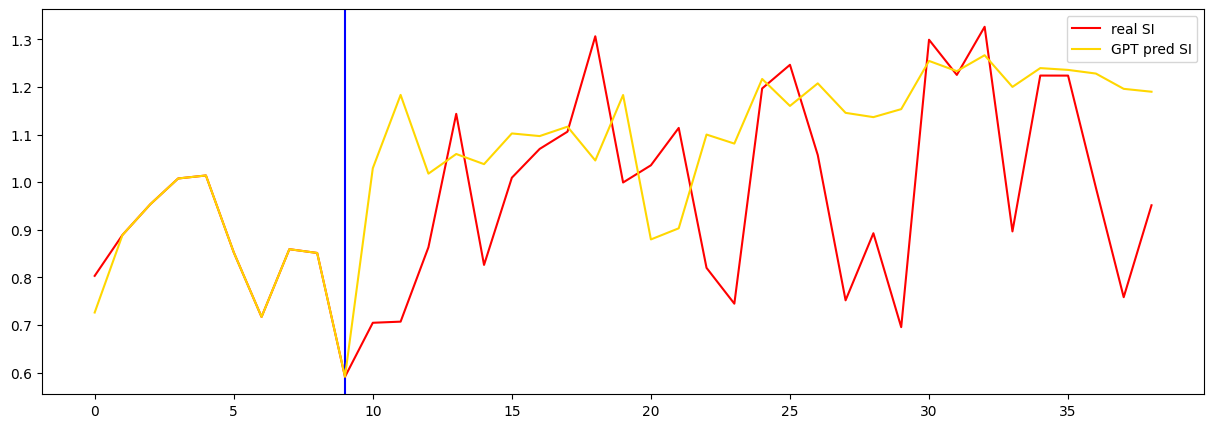

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )


0 train loss =  26.82007598876953
seq length of pred =  30
[ 3.58382464  3.18515412 17.13456995 30.8481561   1.10474389  0.55975852]
loss_SI... [tensor(2.2095, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.3492, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(26.8201, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(26.8201, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  5.953417778015137
seq length of pred =  30
[ 3.31569069  2.24574613 13.18061703 21.33977788  0.5762391   0.38016831]
loss_SI... [tensor(1.1525, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.0559, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(5.9534, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(5.9534, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  3.851285696029663
seq length of pred =  30
[ 3.41265865  2.17932719 12.56943413 20.13763611

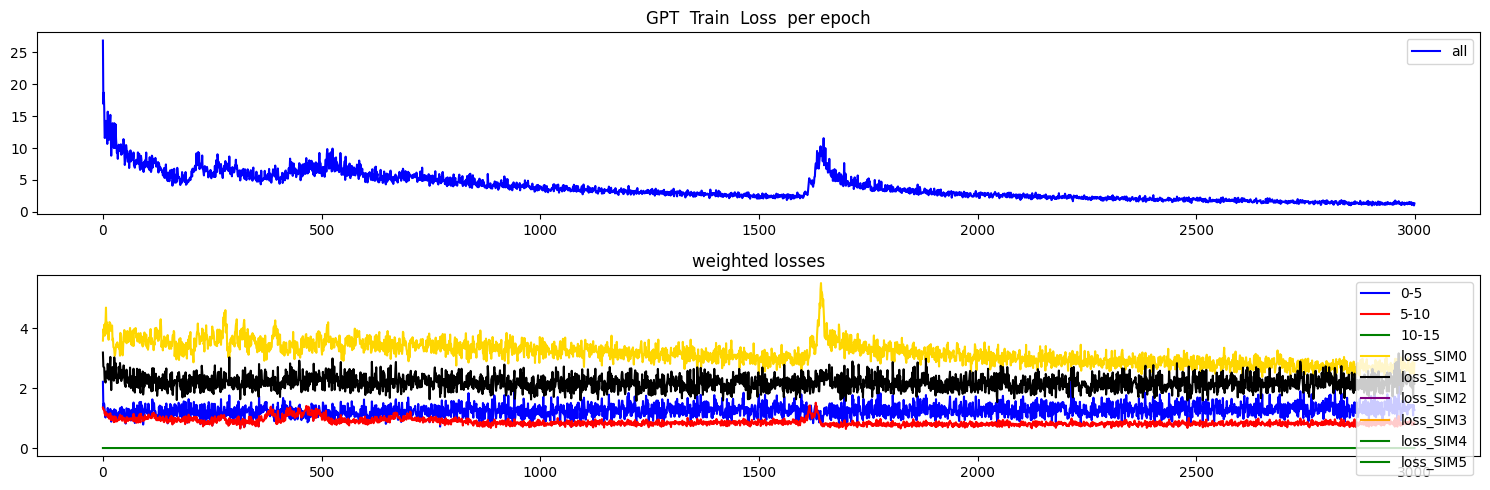

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.06507846713066101
Test MSE Loss - SI only 0-5:  0.038410477340221405
Test MSE Loss - SI only 5-10:  0.10097642987966537
Test MSE Loss - SI only 10-15:  0.05292670801281929
mae, mse, rmse, mape, mspe, rse, corr
(0.20963825, 0.06507847, 0.2551048, 36.29367, 41651.312, 1.1593655)
Testing R**2 - SI only:  -0.3441283625937601
Testing R**2 - SI only:  -0.3441283625937601
Testing R**2 - All features:  0.962177309946571
Testing R**2 - (f2) - SI full:  -3.8045941489005415


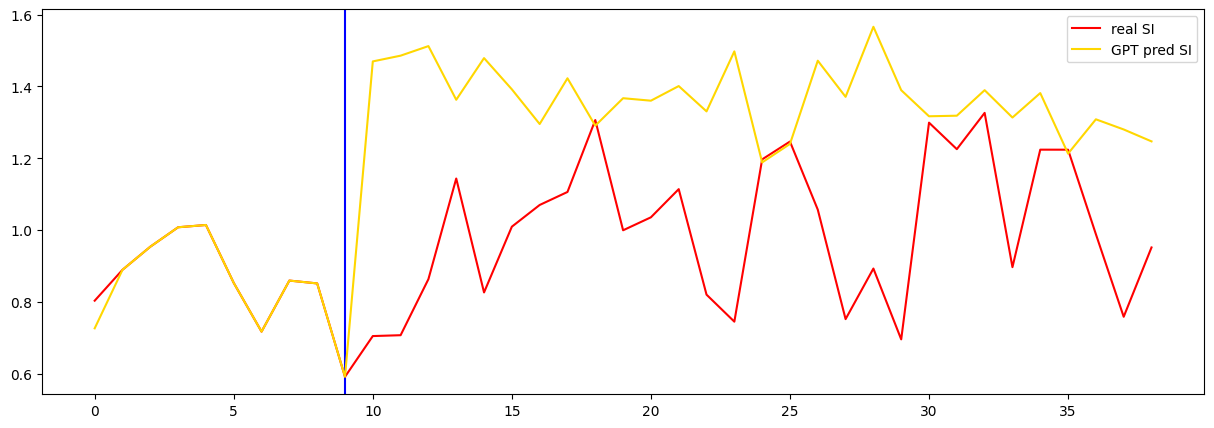

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  21.60605239868164
seq length of pred =  30
[ 3.51268418  2.43593042 14.27913935 28.77259057  0.81172694  0.50939617]
loss_SI... [tensor(1.6235, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.0135, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(21.6061, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(21.6061, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.947090744972229
seq length of pred =  30
[ 3.2224559   1.68117747  8.69770007 16.02679284  0.37006965  0.27808975]
loss_SI... [tensor(0.7401, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.6809, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.9471, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.9471, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  1.1231712102890015
seq length of pred =  30
[ 2.79532575  1.79696984  9.7751734  16.6322811

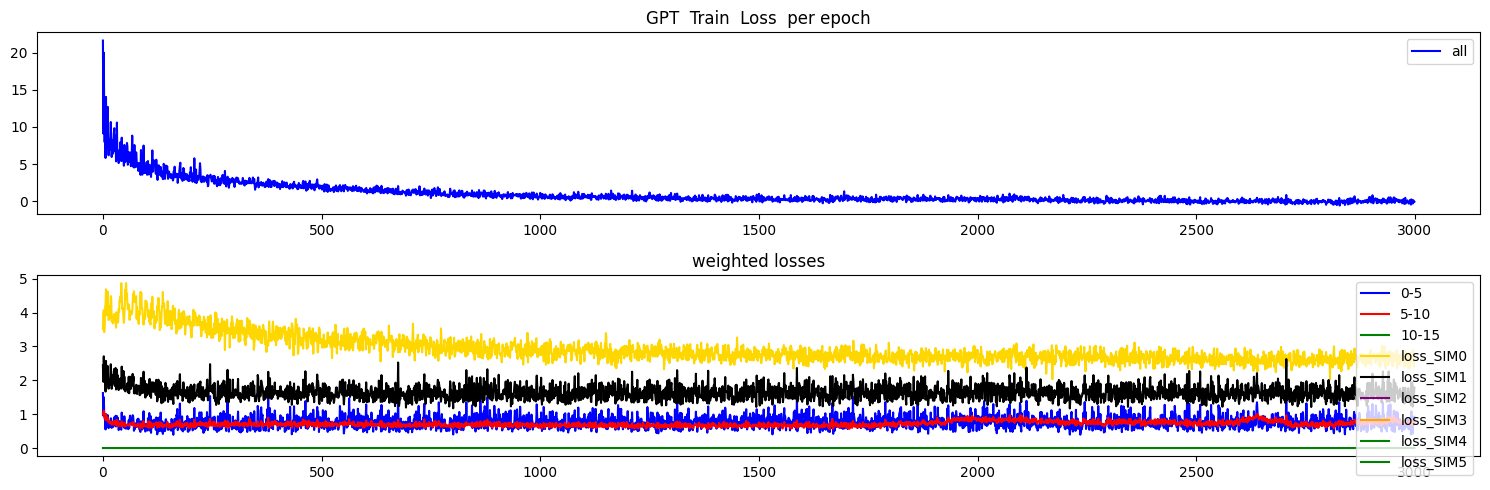

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.10597547143697739
Test MSE Loss - SI only 0-5:  0.038410477340221405
Test MSE Loss - SI only 5-10:  0.11977028846740723
Test MSE Loss - SI only 10-15:  0.10755495727062225
mae, mse, rmse, mape, mspe, rse, corr
(0.26447096, 0.10597548, 0.32553875, 80.45673, 222423.25, 1.479464)
Testing R**2 - SI only:  -1.1888138476786398
Testing R**2 - SI only:  -1.1888138476786398
Testing R**2 - All features:  0.9434693071773219
Testing R**2 - (f2) - SI full:  -0.22713938522976784


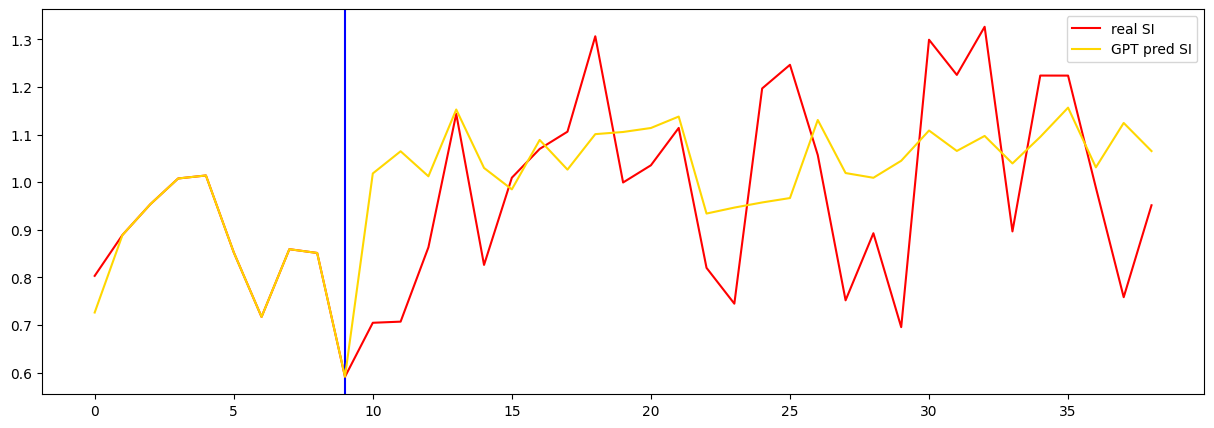

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  27.933349609375
seq length of pred =  30
[ 3.57236665  2.85559458 16.34050134 29.26876854  0.95906719  0.51885705]
loss_SI... [tensor(1.9181, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1718, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(27.9333, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(27.9333, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  3.3632915019989014
seq length of pred =  30
[ 3.474314    2.04082029 10.5625056  17.77168449  0.61767933  0.31131358]
loss_SI... [tensor(1.2354, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8586, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(3.3633, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(3.3633, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  2.0517079830169678
seq length of pred =  30
[ 3.20981876  2.43129313 12.45334736 19.78189171

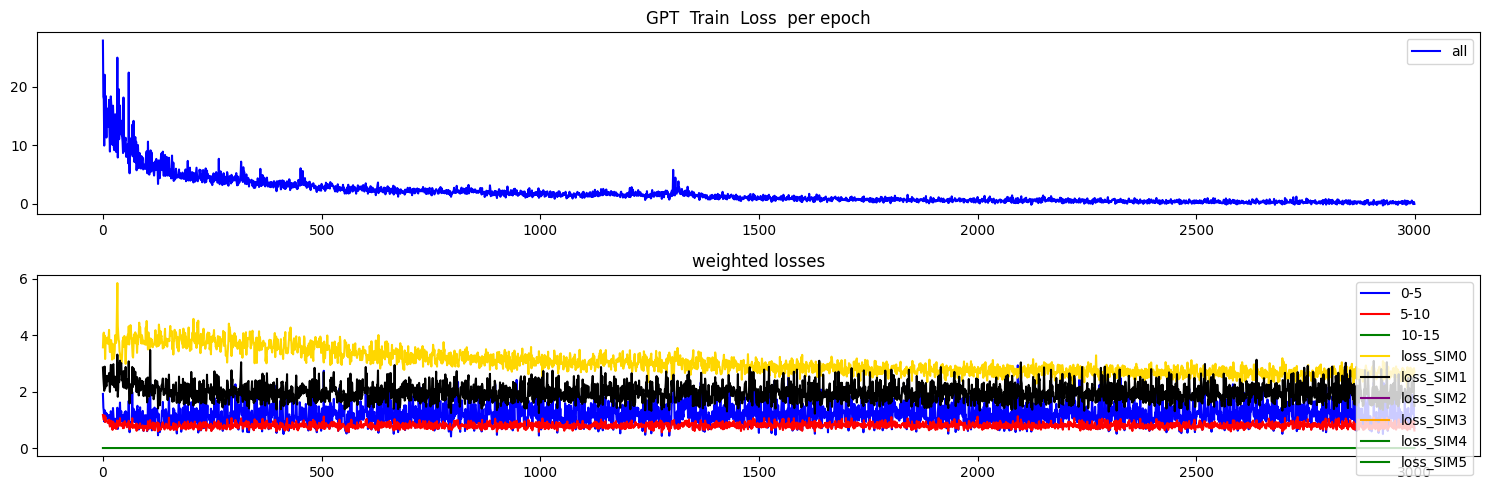

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.16338348388671875
Test MSE Loss - SI only 0-5:  0.038410477340221405
Test MSE Loss - SI only 5-10:  0.18241235613822937
Test MSE Loss - SI only 10-15:  0.17720100283622742
mae, mse, rmse, mape, mspe, rse, corr
(0.33969936, 0.16338348, 0.40420723, 104.777664, 376603.0, 1.8369858)
Testing R**2 - SI only:  -2.3745169946832183
Testing R**2 - SI only:  -2.3745169946832183
Testing R**2 - All features:  0.9340829430881697
Testing R**2 - (f2) - SI full:  -6.034839410170201


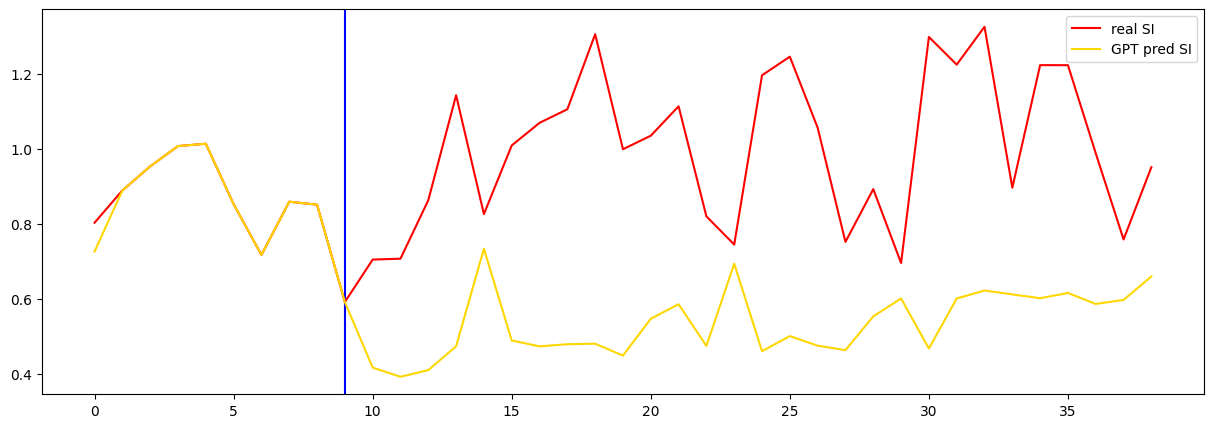

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )



## Run 5


In [38]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  13.61298942565918
seq length of pred =  30
[ 3.72543242  1.97925302 16.40299845 27.67838567  0.79599442  0.50376208]
loss_SI... [tensor(1.5920, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.4210, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(13.6130, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(13.6130, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.3269398212432861
seq length of pred =  30
[ 2.64988895  1.8566053  15.27860102 24.05243441  0.73543587  0.45151111]
loss_SI... [tensor(1.4709, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.9793, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.3269, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.3269, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  1.4187164306640625
seq length of pred =  30
[ 2.61480035  1.86961704 14.08531816 23.039172

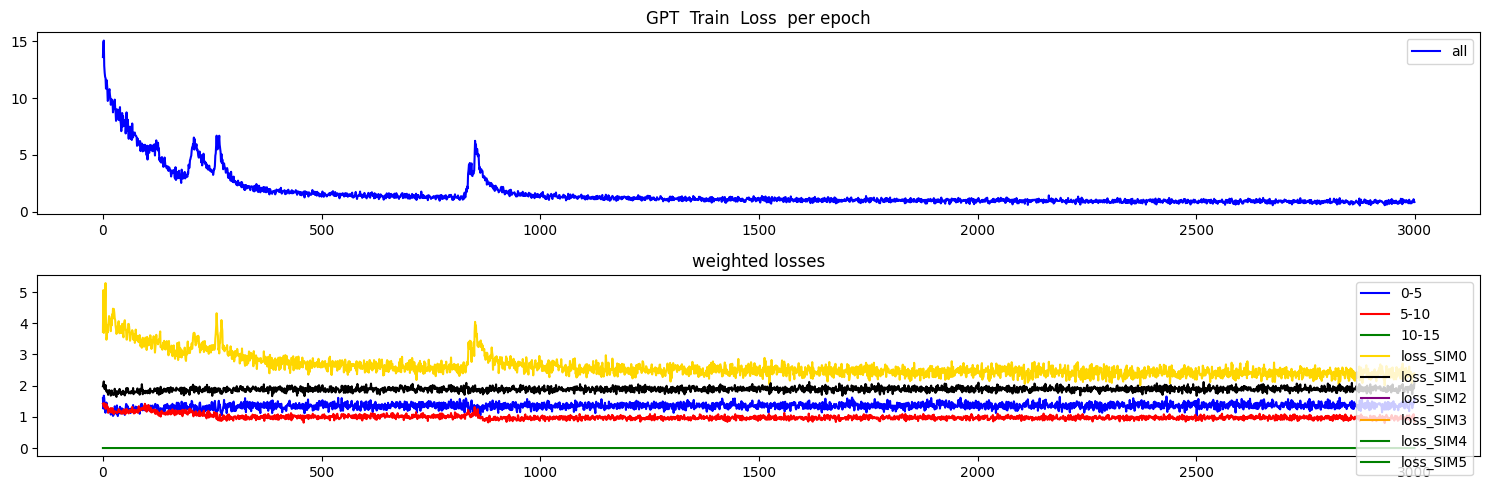

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.03234032914042473
Test MSE Loss - SI only 0-5:  0.10213689506053925
Test MSE Loss - SI only 5-10:  0.010981489904224873
Test MSE Loss - SI only 10-15:  0.02172110602259636
mae, mse, rmse, mape, mspe, rse, corr
(0.14403239, 0.03234033, 0.17983417, 4.386011, 354.1958, 1.1934972)
Testing R**2 - SI only:  -0.42443537917893415
Testing R**2 - SI only:  -0.42443537917893415
Testing R**2 - All features:  0.9943052054281306
Testing R**2 - (f2) - SI full:  -0.06901804287586799


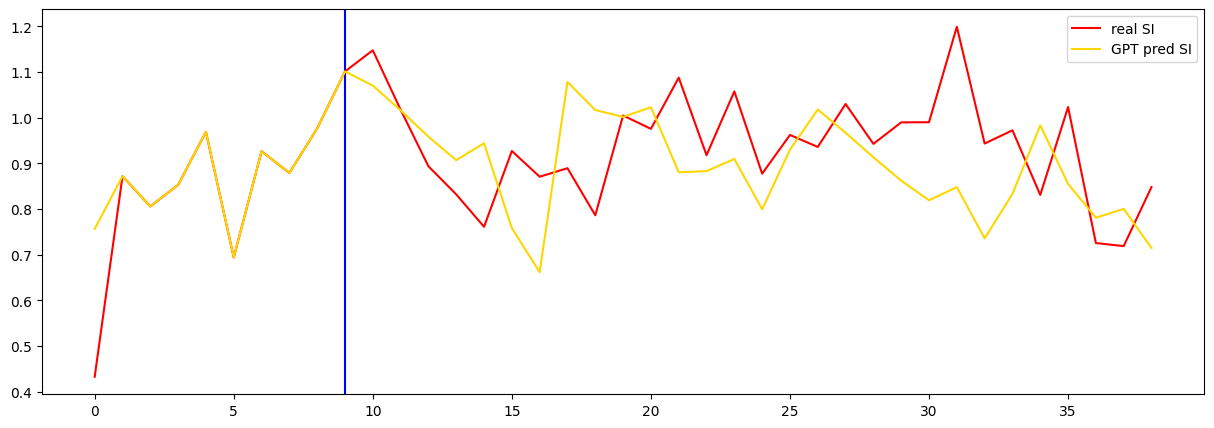

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )


0 train loss =  19.39220428466797
seq length of pred =  30
[ 3.96470776  2.26480711 18.2626434  31.40299733  1.0845839   0.58792251]
loss_SI... [tensor(2.1692, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.3579, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(19.3922, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(19.3922, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  4.066980361938477
seq length of pred =  30
[ 2.82604963  1.96766723 13.15098859 23.32585909  0.78514282  0.45118172]
loss_SI... [tensor(1.5703, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.9946, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(4.0670, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(4.0670, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  3.3259811401367188
seq length of pred =  30
[ 2.95672419  2.15487024 16.75311822 25.9953931

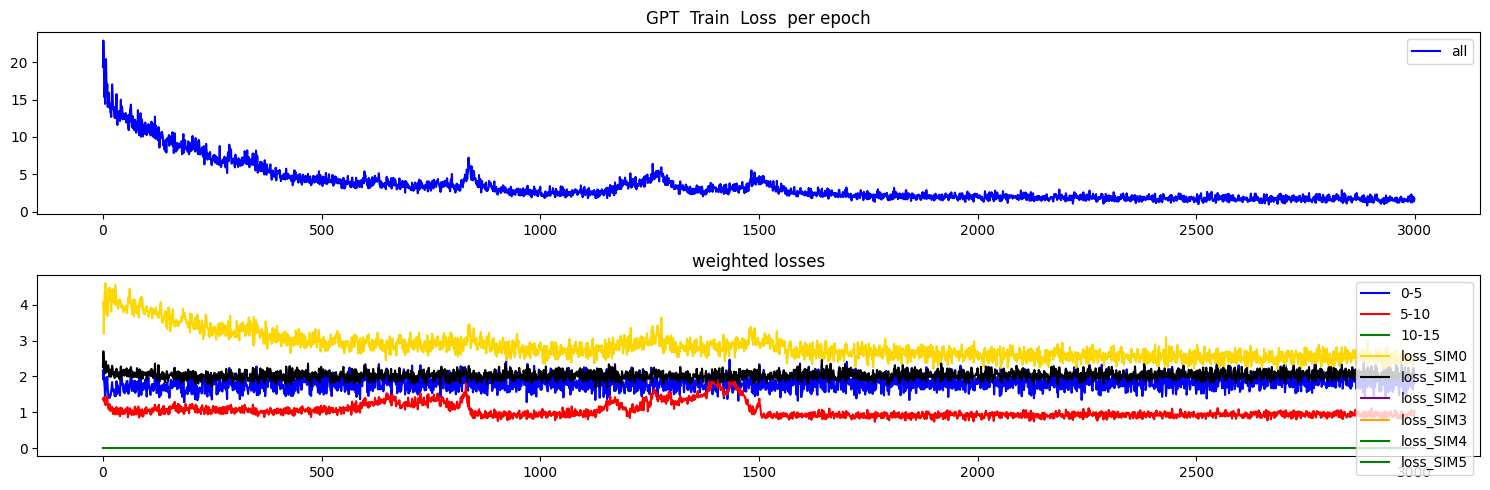

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.05556285008788109
Test MSE Loss - SI only 0-5:  0.10213689506053925
Test MSE Loss - SI only 5-10:  0.06630778312683105
Test MSE Loss - SI only 10-15:  0.02638186141848564
mae, mse, rmse, mape, mspe, rse, corr
(0.19299439, 0.05556285, 0.23571773, 14.426953, 5488.6406, 1.564377)
Testing R**2 - SI only:  -1.4472753209502889
Testing R**2 - SI only:  -1.4472753209502889
Testing R**2 - All features:  0.9892666437067646
Testing R**2 - (f2) - SI full:  -0.2858357048253237


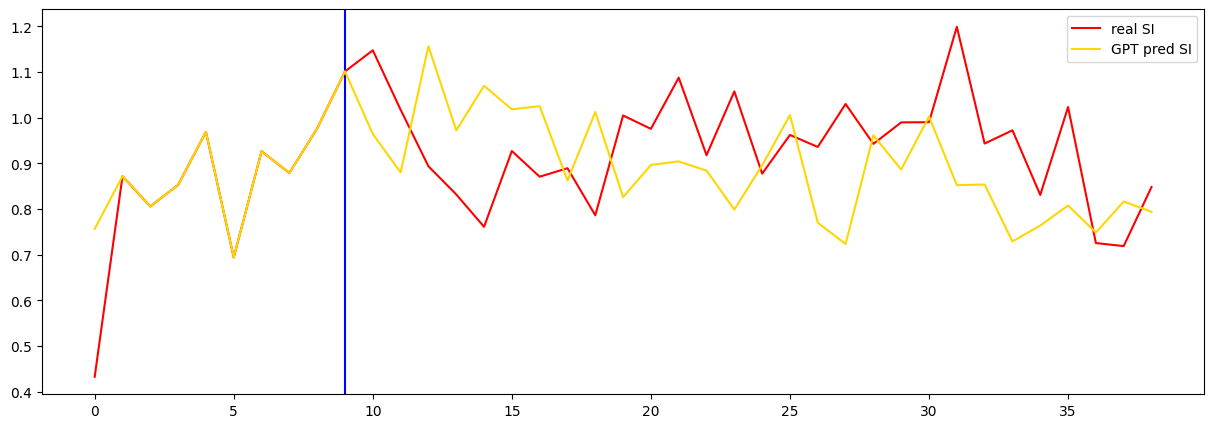

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29  )


0 train loss =  15.572421073913574
seq length of pred =  30
[ 4.03705038  2.25449839 15.95593018 27.09916189  0.77849032  0.48478602]
loss_SI... [tensor(1.5570, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.2836, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(15.5724, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(15.5724, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  4.122772216796875
seq length of pred =  30
[ 3.0971276   1.99002254 14.66996744 24.18386753  0.81338894  0.46536827]
loss_SI... [tensor(1.6268, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.9864, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(4.1228, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(4.1228, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  2.6781511306762695
seq length of pred =  30
[ 2.69610116  1.96216874 13.75429746 22.913686

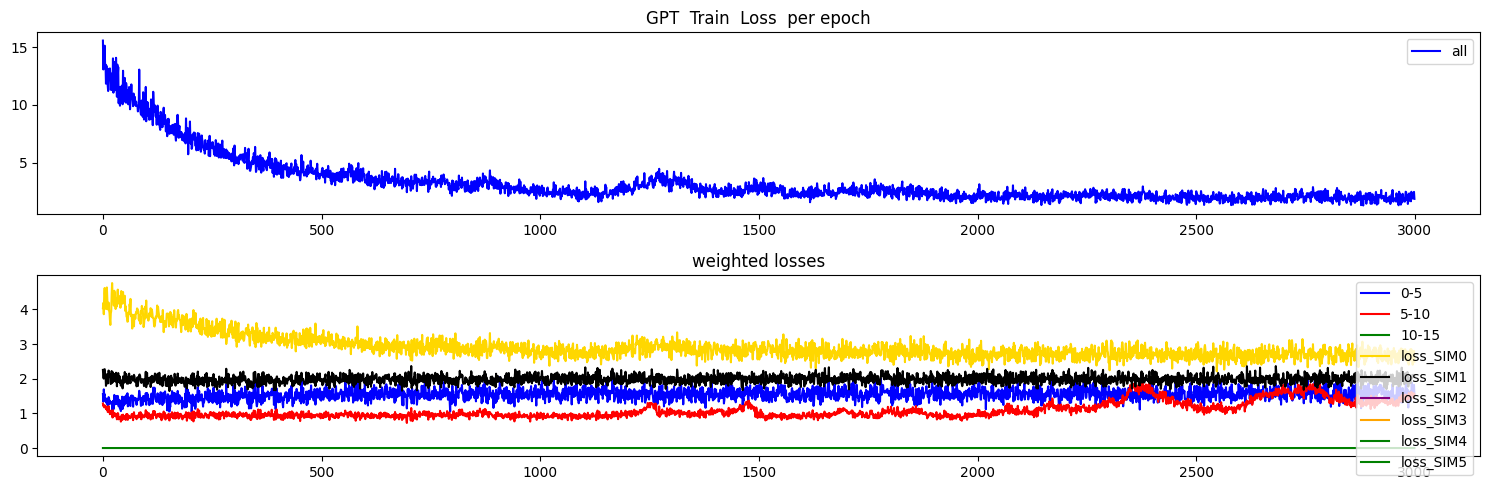

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.0508478619158268
Test MSE Loss - SI only 0-5:  0.10213690996170044
Test MSE Loss - SI only 5-10:  0.018094709143042564
Test MSE Loss - SI only 10-15:  0.05967924743890762
mae, mse, rmse, mape, mspe, rse, corr
(0.18354325, 0.050847862, 0.2254947, 7.9480567, 1133.393, 1.4965303)
Testing R**2 - SI only:  -1.2396028155954544
Testing R**2 - SI only:  -1.2396028155954544
Testing R**2 - All features:  0.9731092006109565
Testing R**2 - (f2) - SI full:  -0.12353456818373343


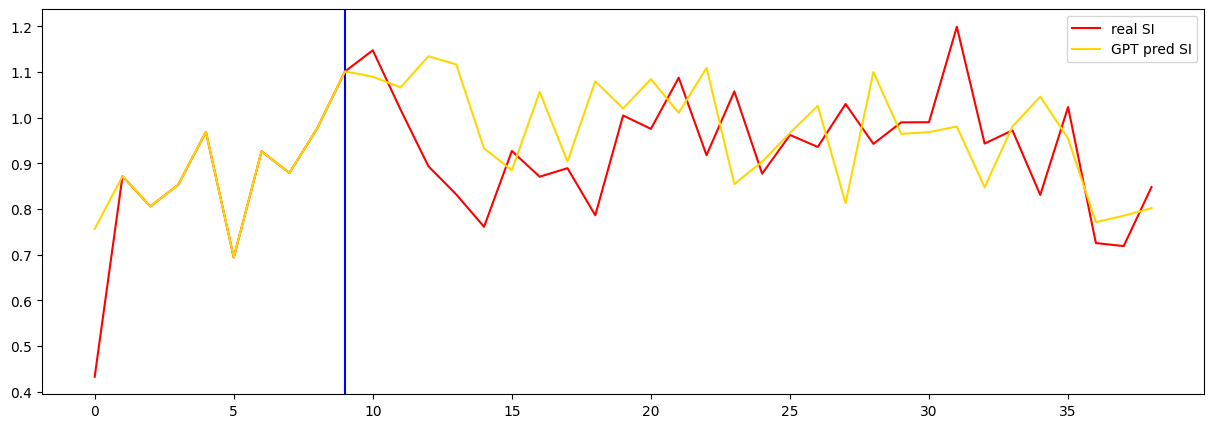

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )


0 train loss =  16.840614318847656
seq length of pred =  30
[ 3.79084217  2.36903304 15.18158697 27.8944648   0.8540132   0.50382844]
loss_SI... [tensor(1.7080, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.2464, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(16.8406, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(16.8406, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  4.028255939483643
seq length of pred =  30
[ 3.09685197  1.88919621 12.80403395 21.65820665  0.55973637  0.39158307]
loss_SI... [tensor(1.1195, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8812, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(4.0283, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(4.0283, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  2.505370616912842
seq length of pred =  30
[ 2.62332236  2.1914569  14.24646639 23.4644711

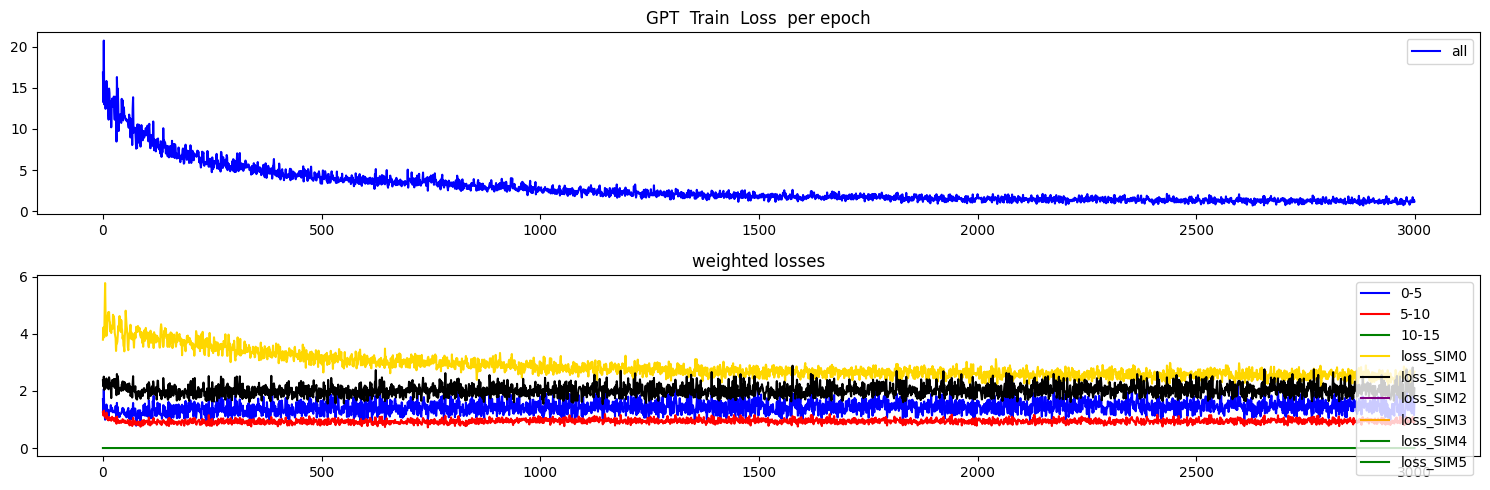

max tokens  29
torch.Size([1, 10, 35])
(39,)
(39,)
Test MSE Loss - SI only:  0.07401072233915329
Test MSE Loss - SI only 0-5:  0.10213689506053925
Test MSE Loss - SI only 5-10:  0.07096584141254425
Test MSE Loss - SI only 10-15:  0.04731182008981705
mae, mse, rmse, mape, mspe, rse, corr
(0.23382556, 0.07401073, 0.27204913, 20.440445, 11198.519, 1.8054959)
Testing R**2 - SI only:  -2.2598152112730436
Testing R**2 - SI only:  -2.2598152112730436
Testing R**2 - All features:  0.97777289916278
Testing R**2 - (f2) - SI full:  -2.189874838469005


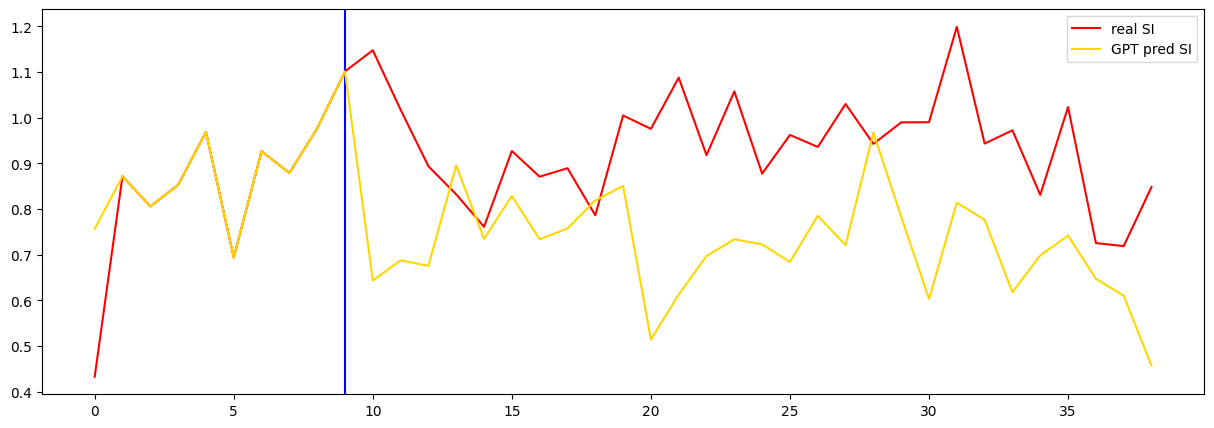

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 29 )



## Train on Train, Test on Train



## 000 to 015


In [ ]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 015 to 030


In [ ]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 030 to 045


In [ ]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 045 to 060


In [ ]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 060 to 075


In [ ]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 075 to 090


In [ ]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 090 to 105


In [ ]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## Save excel to csv


In [ ]:
 
## inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [ ]:

## tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
